In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

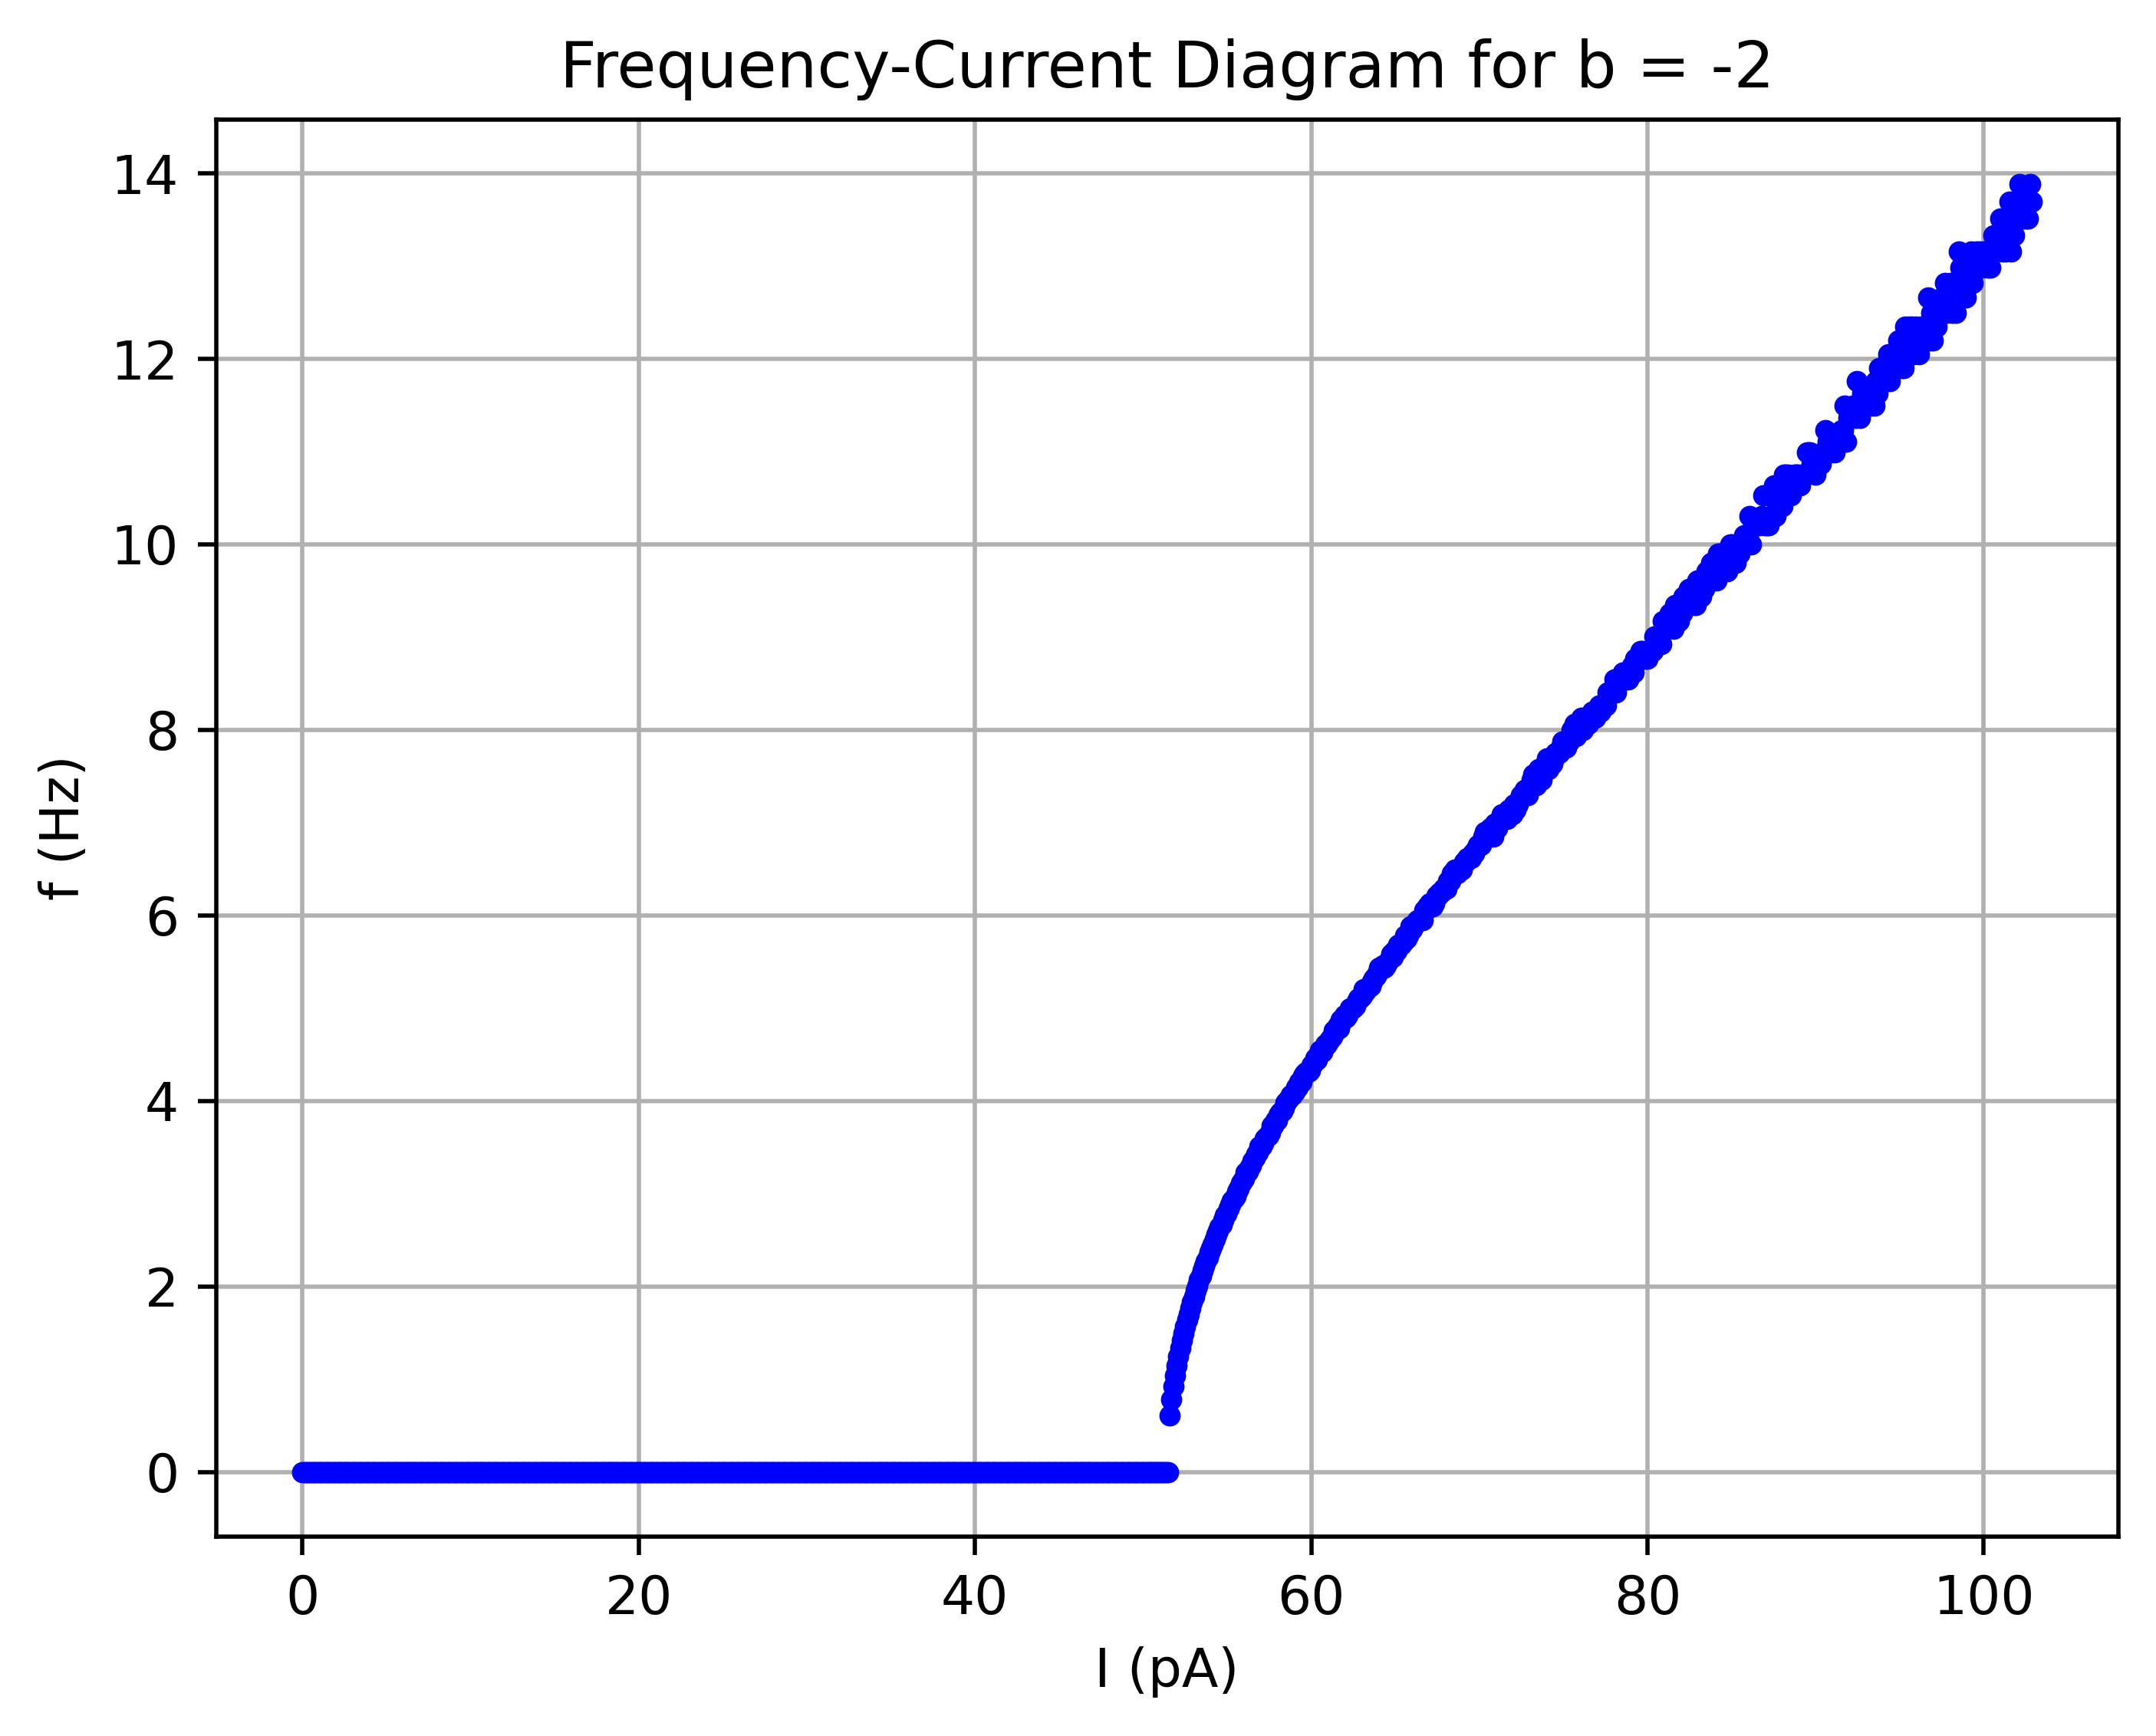

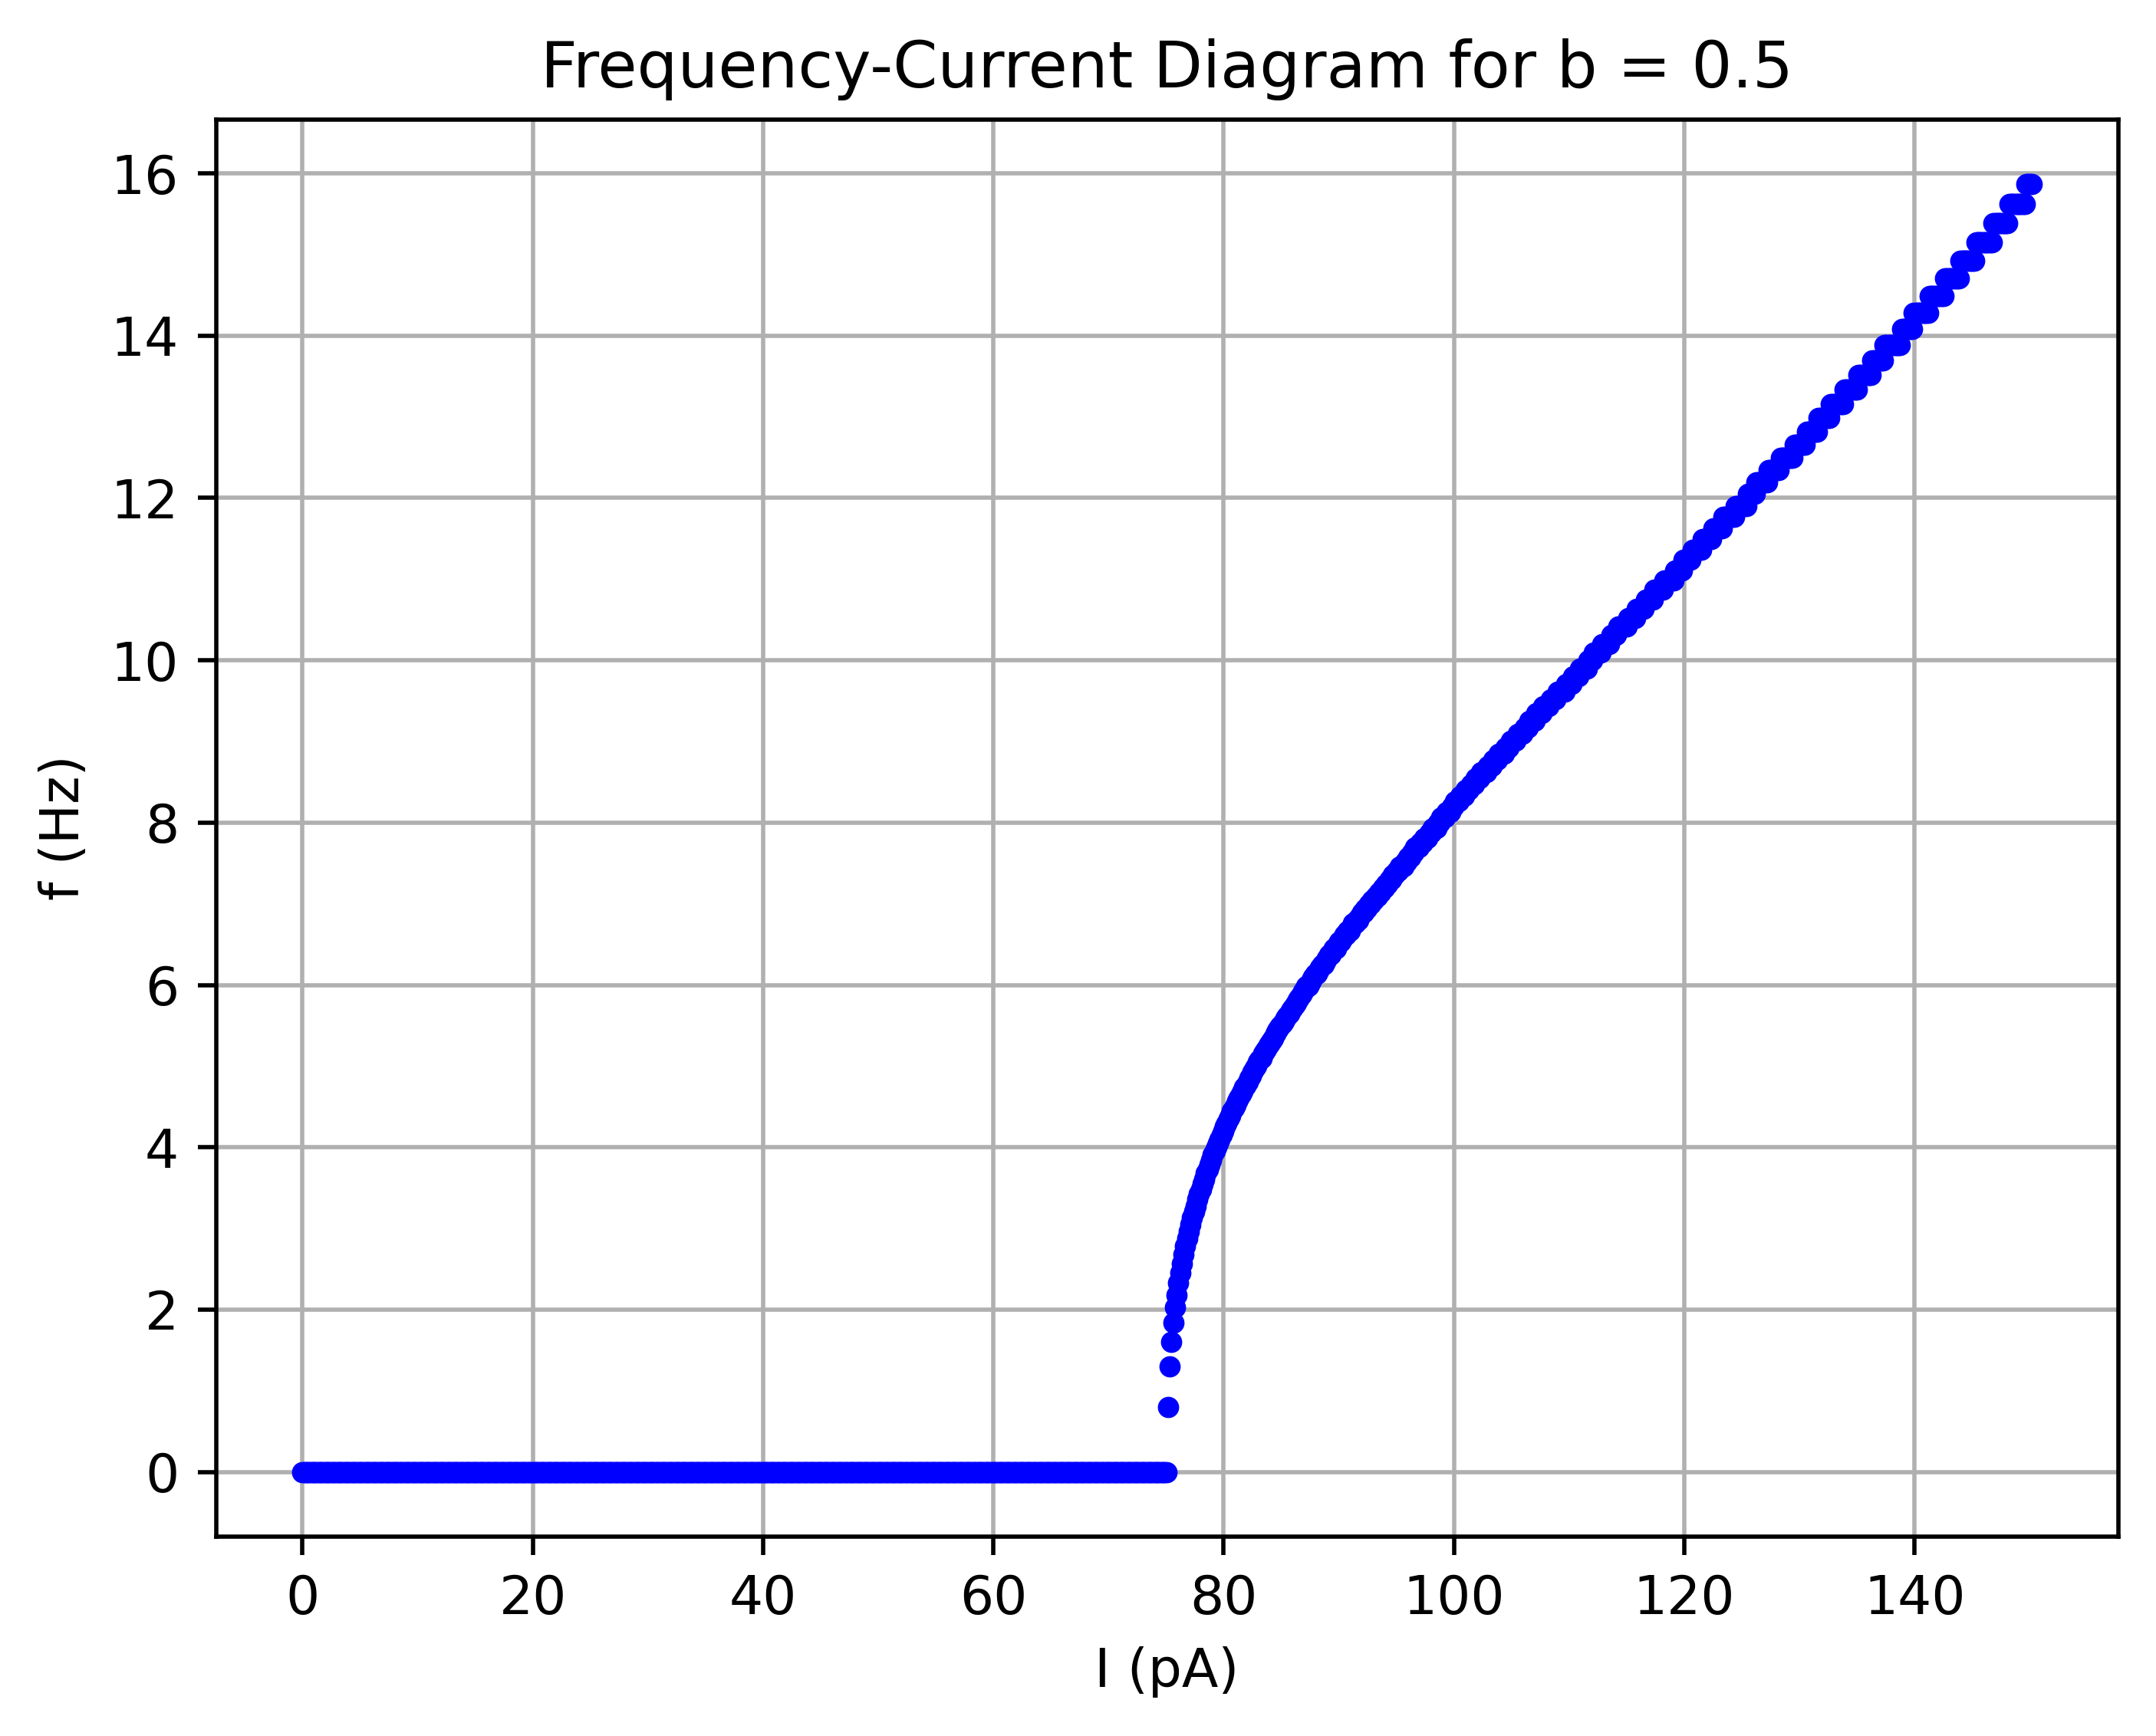

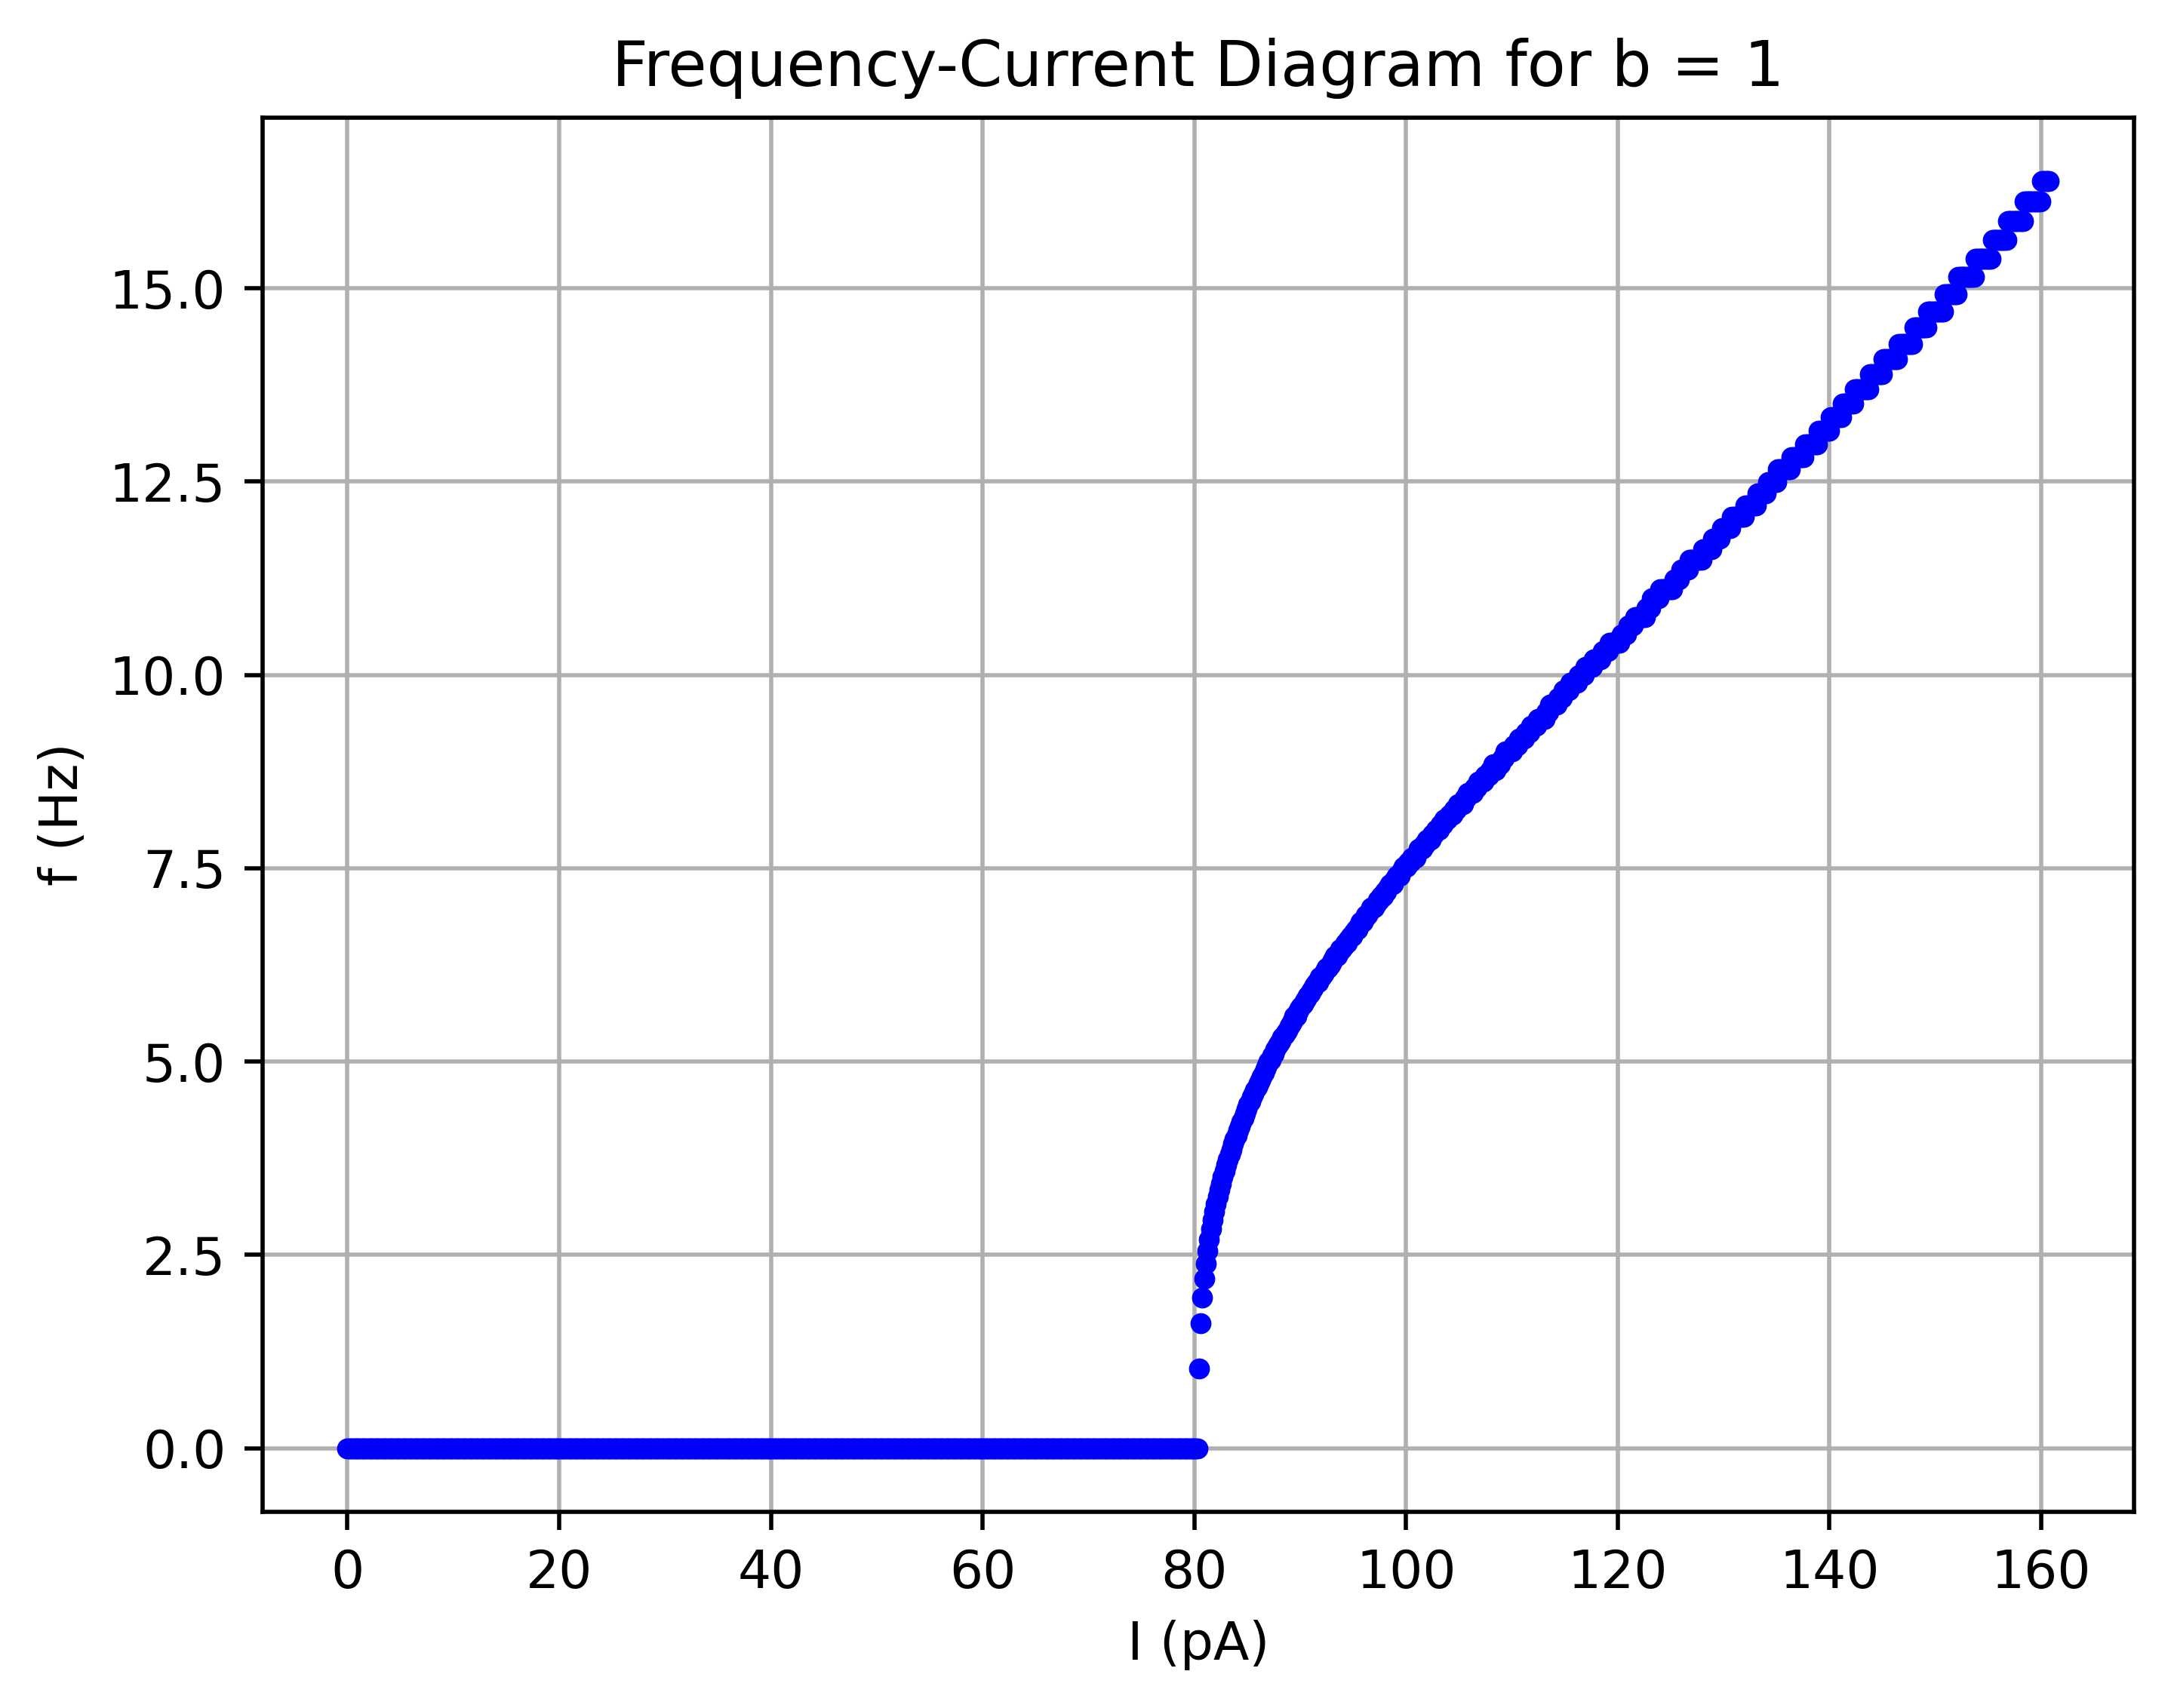

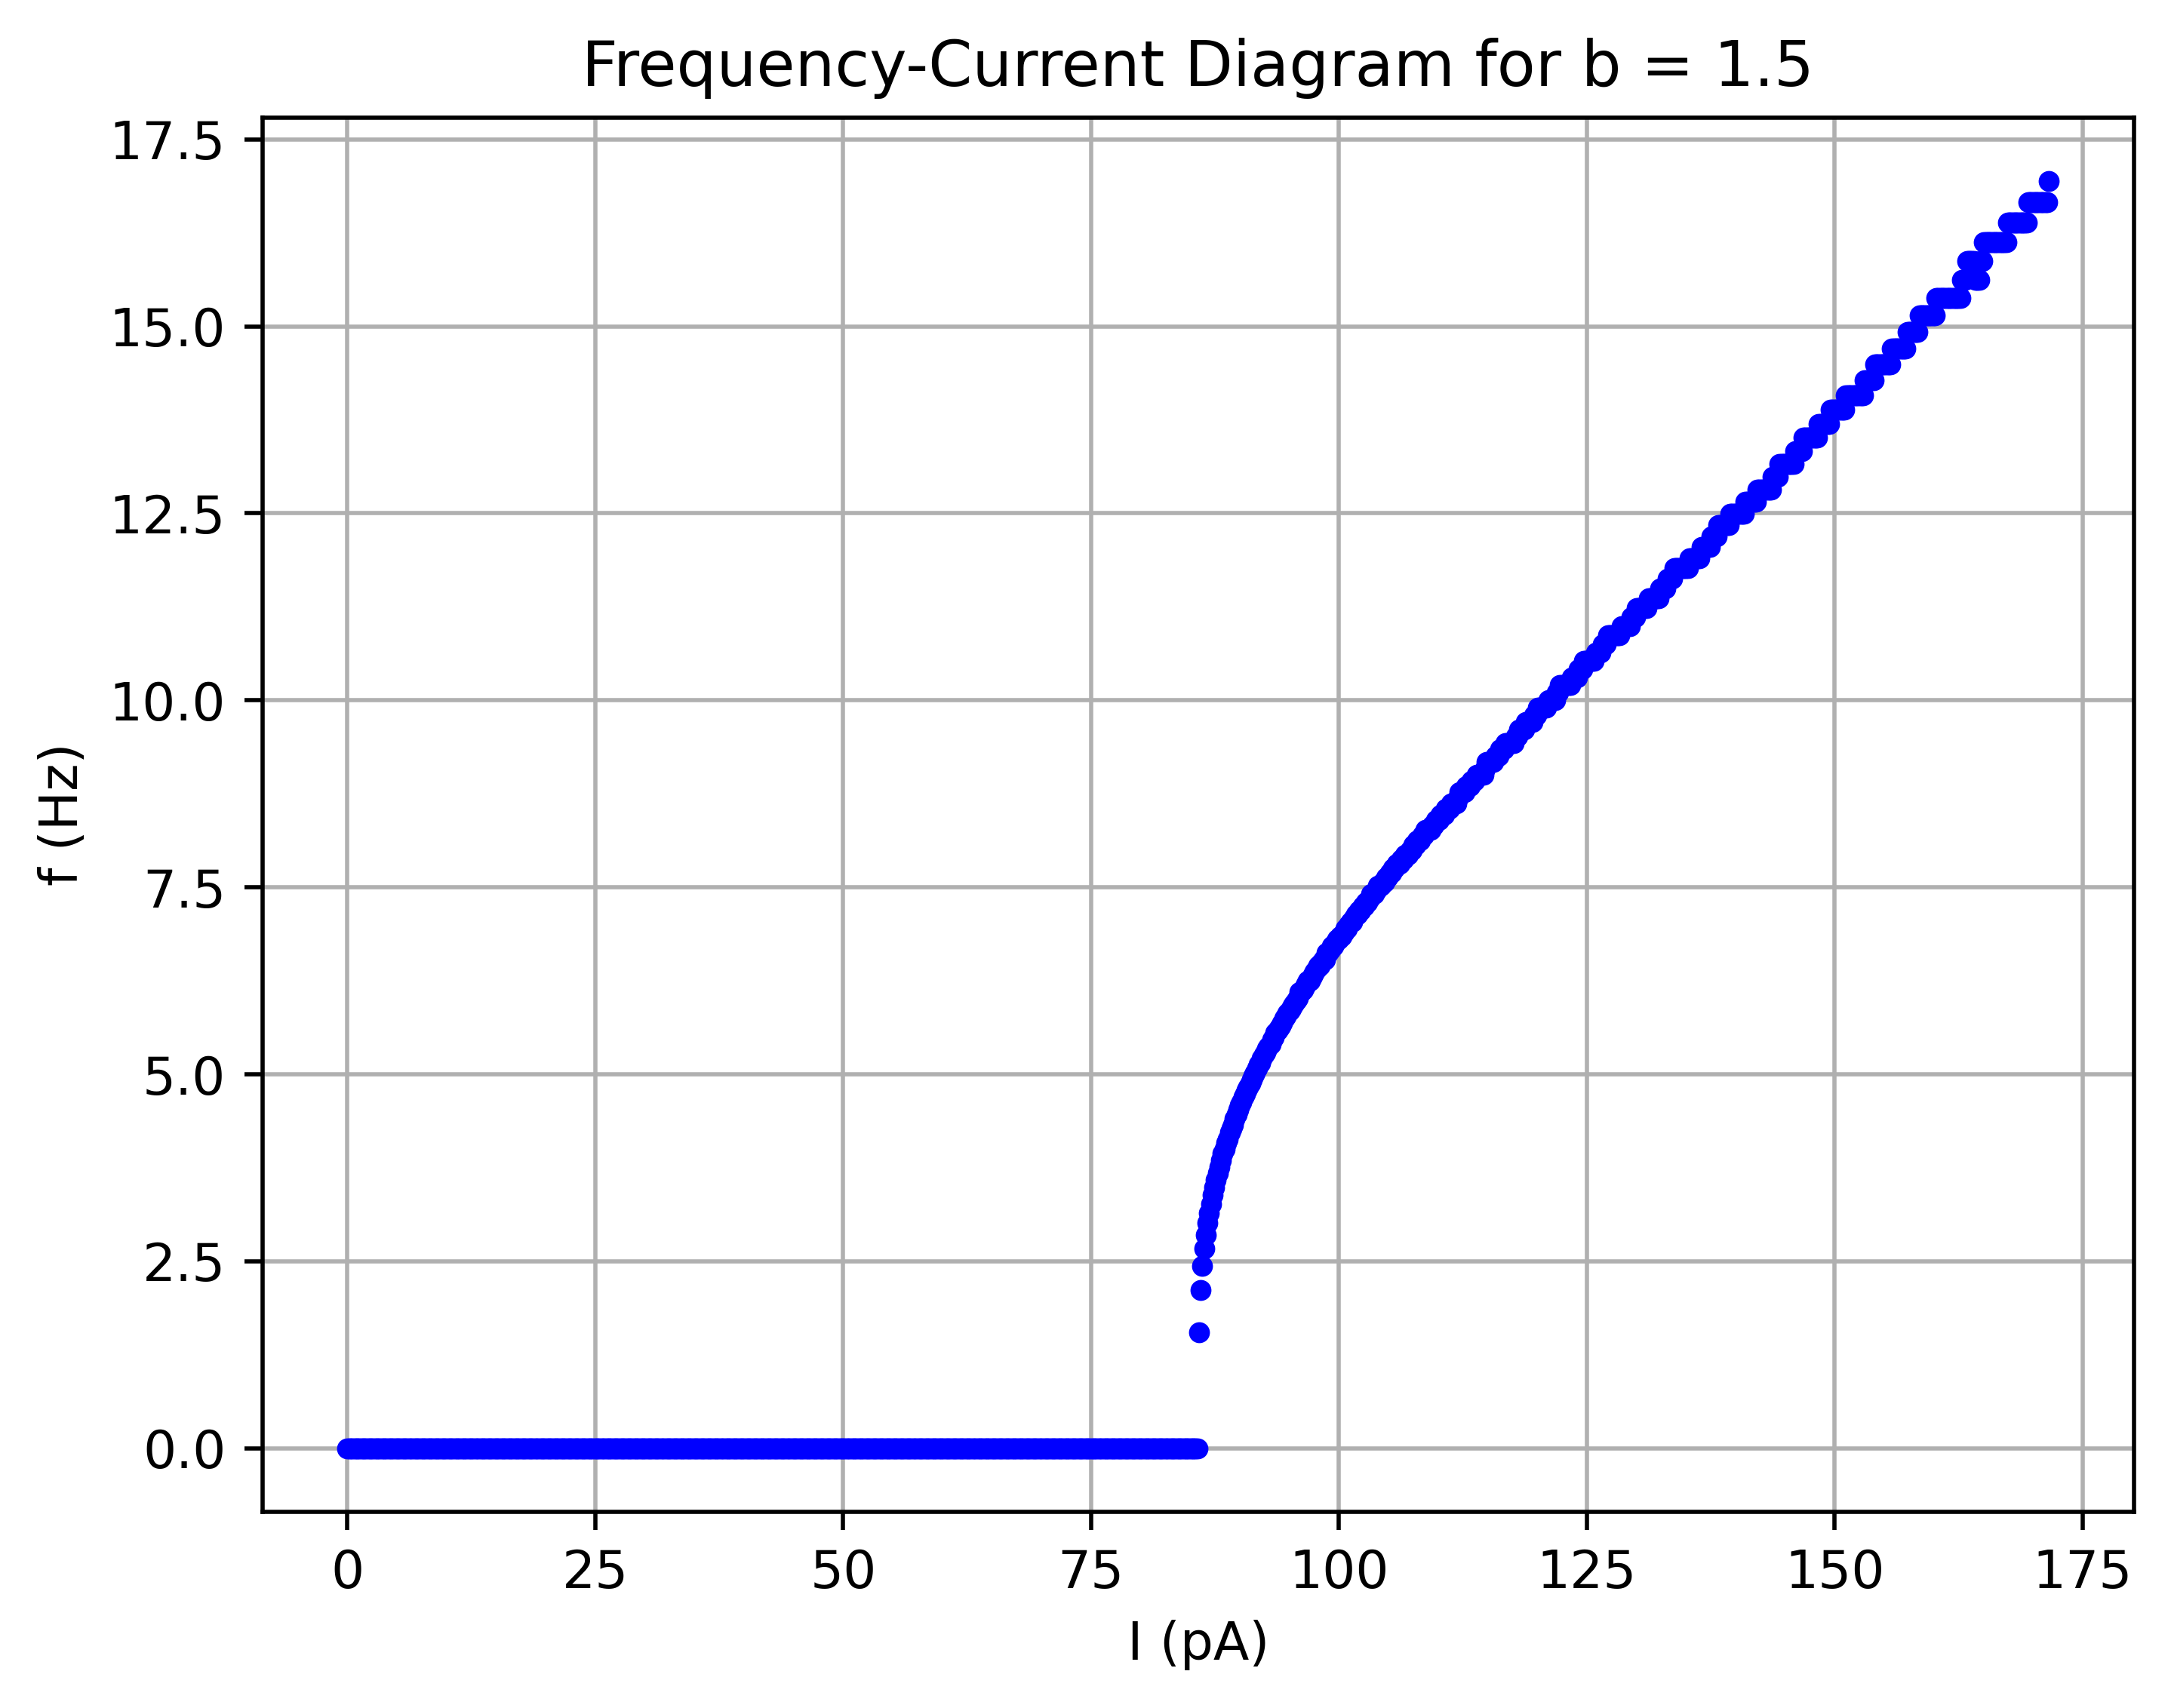

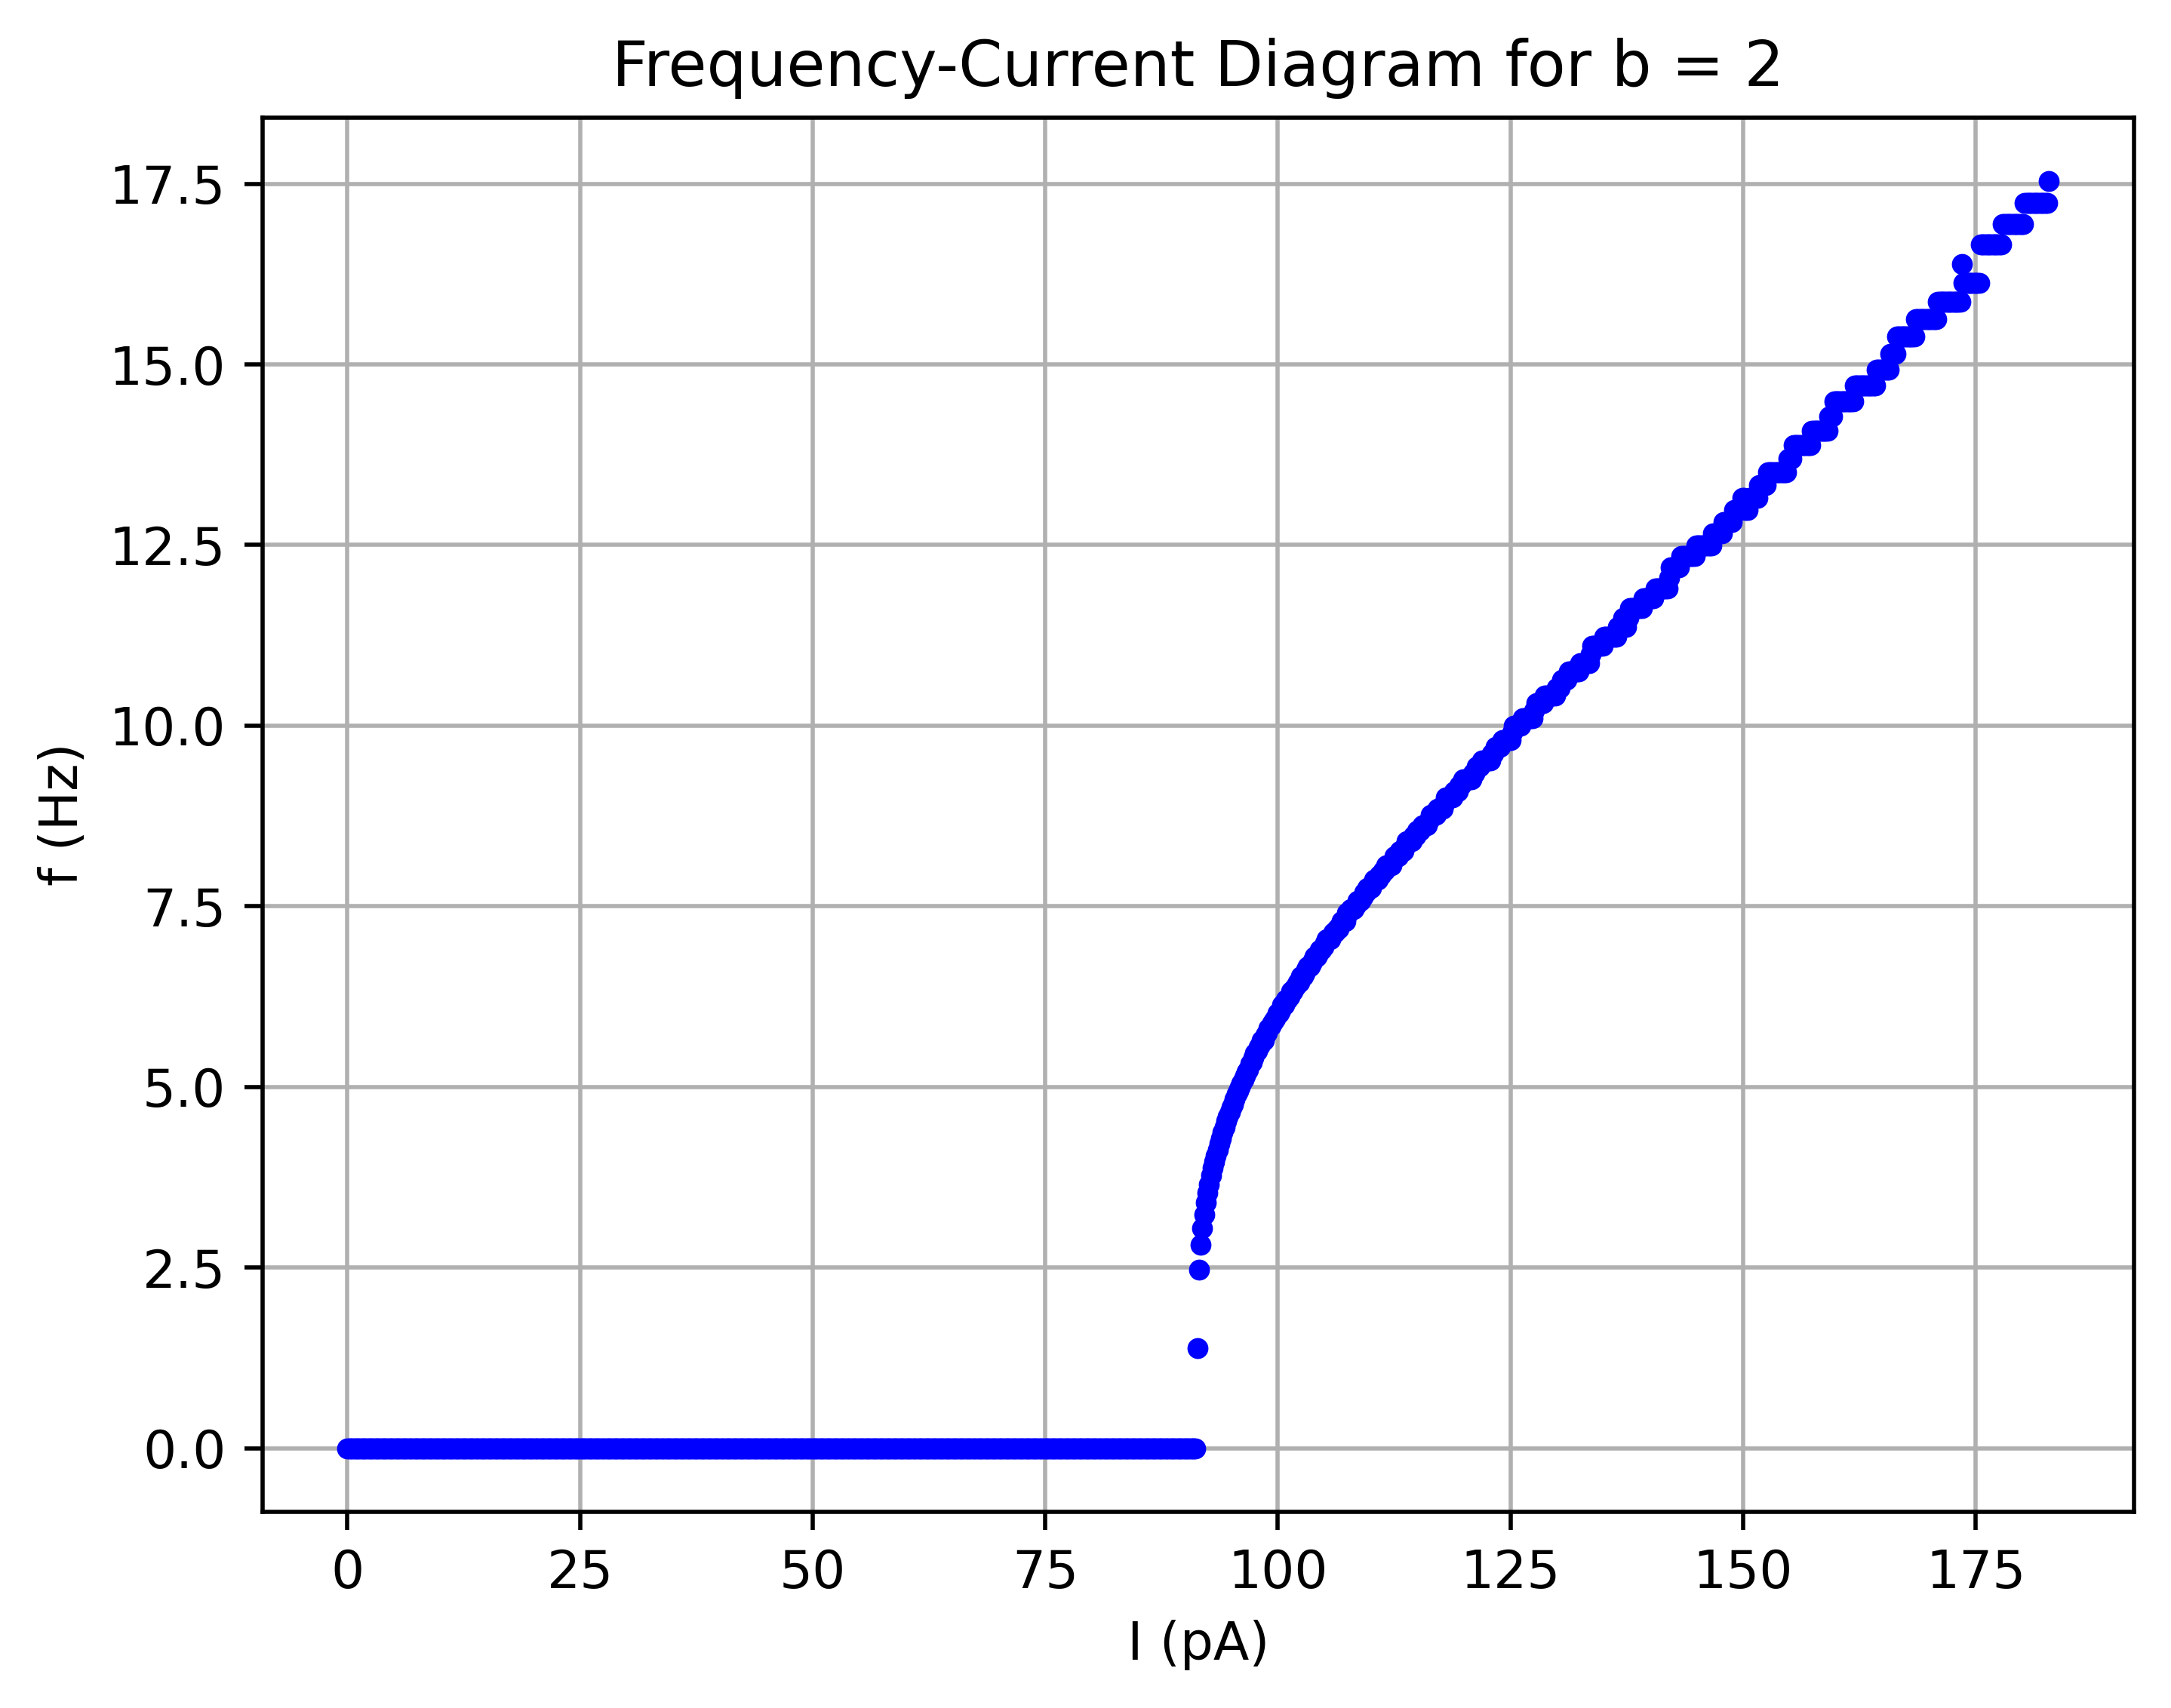

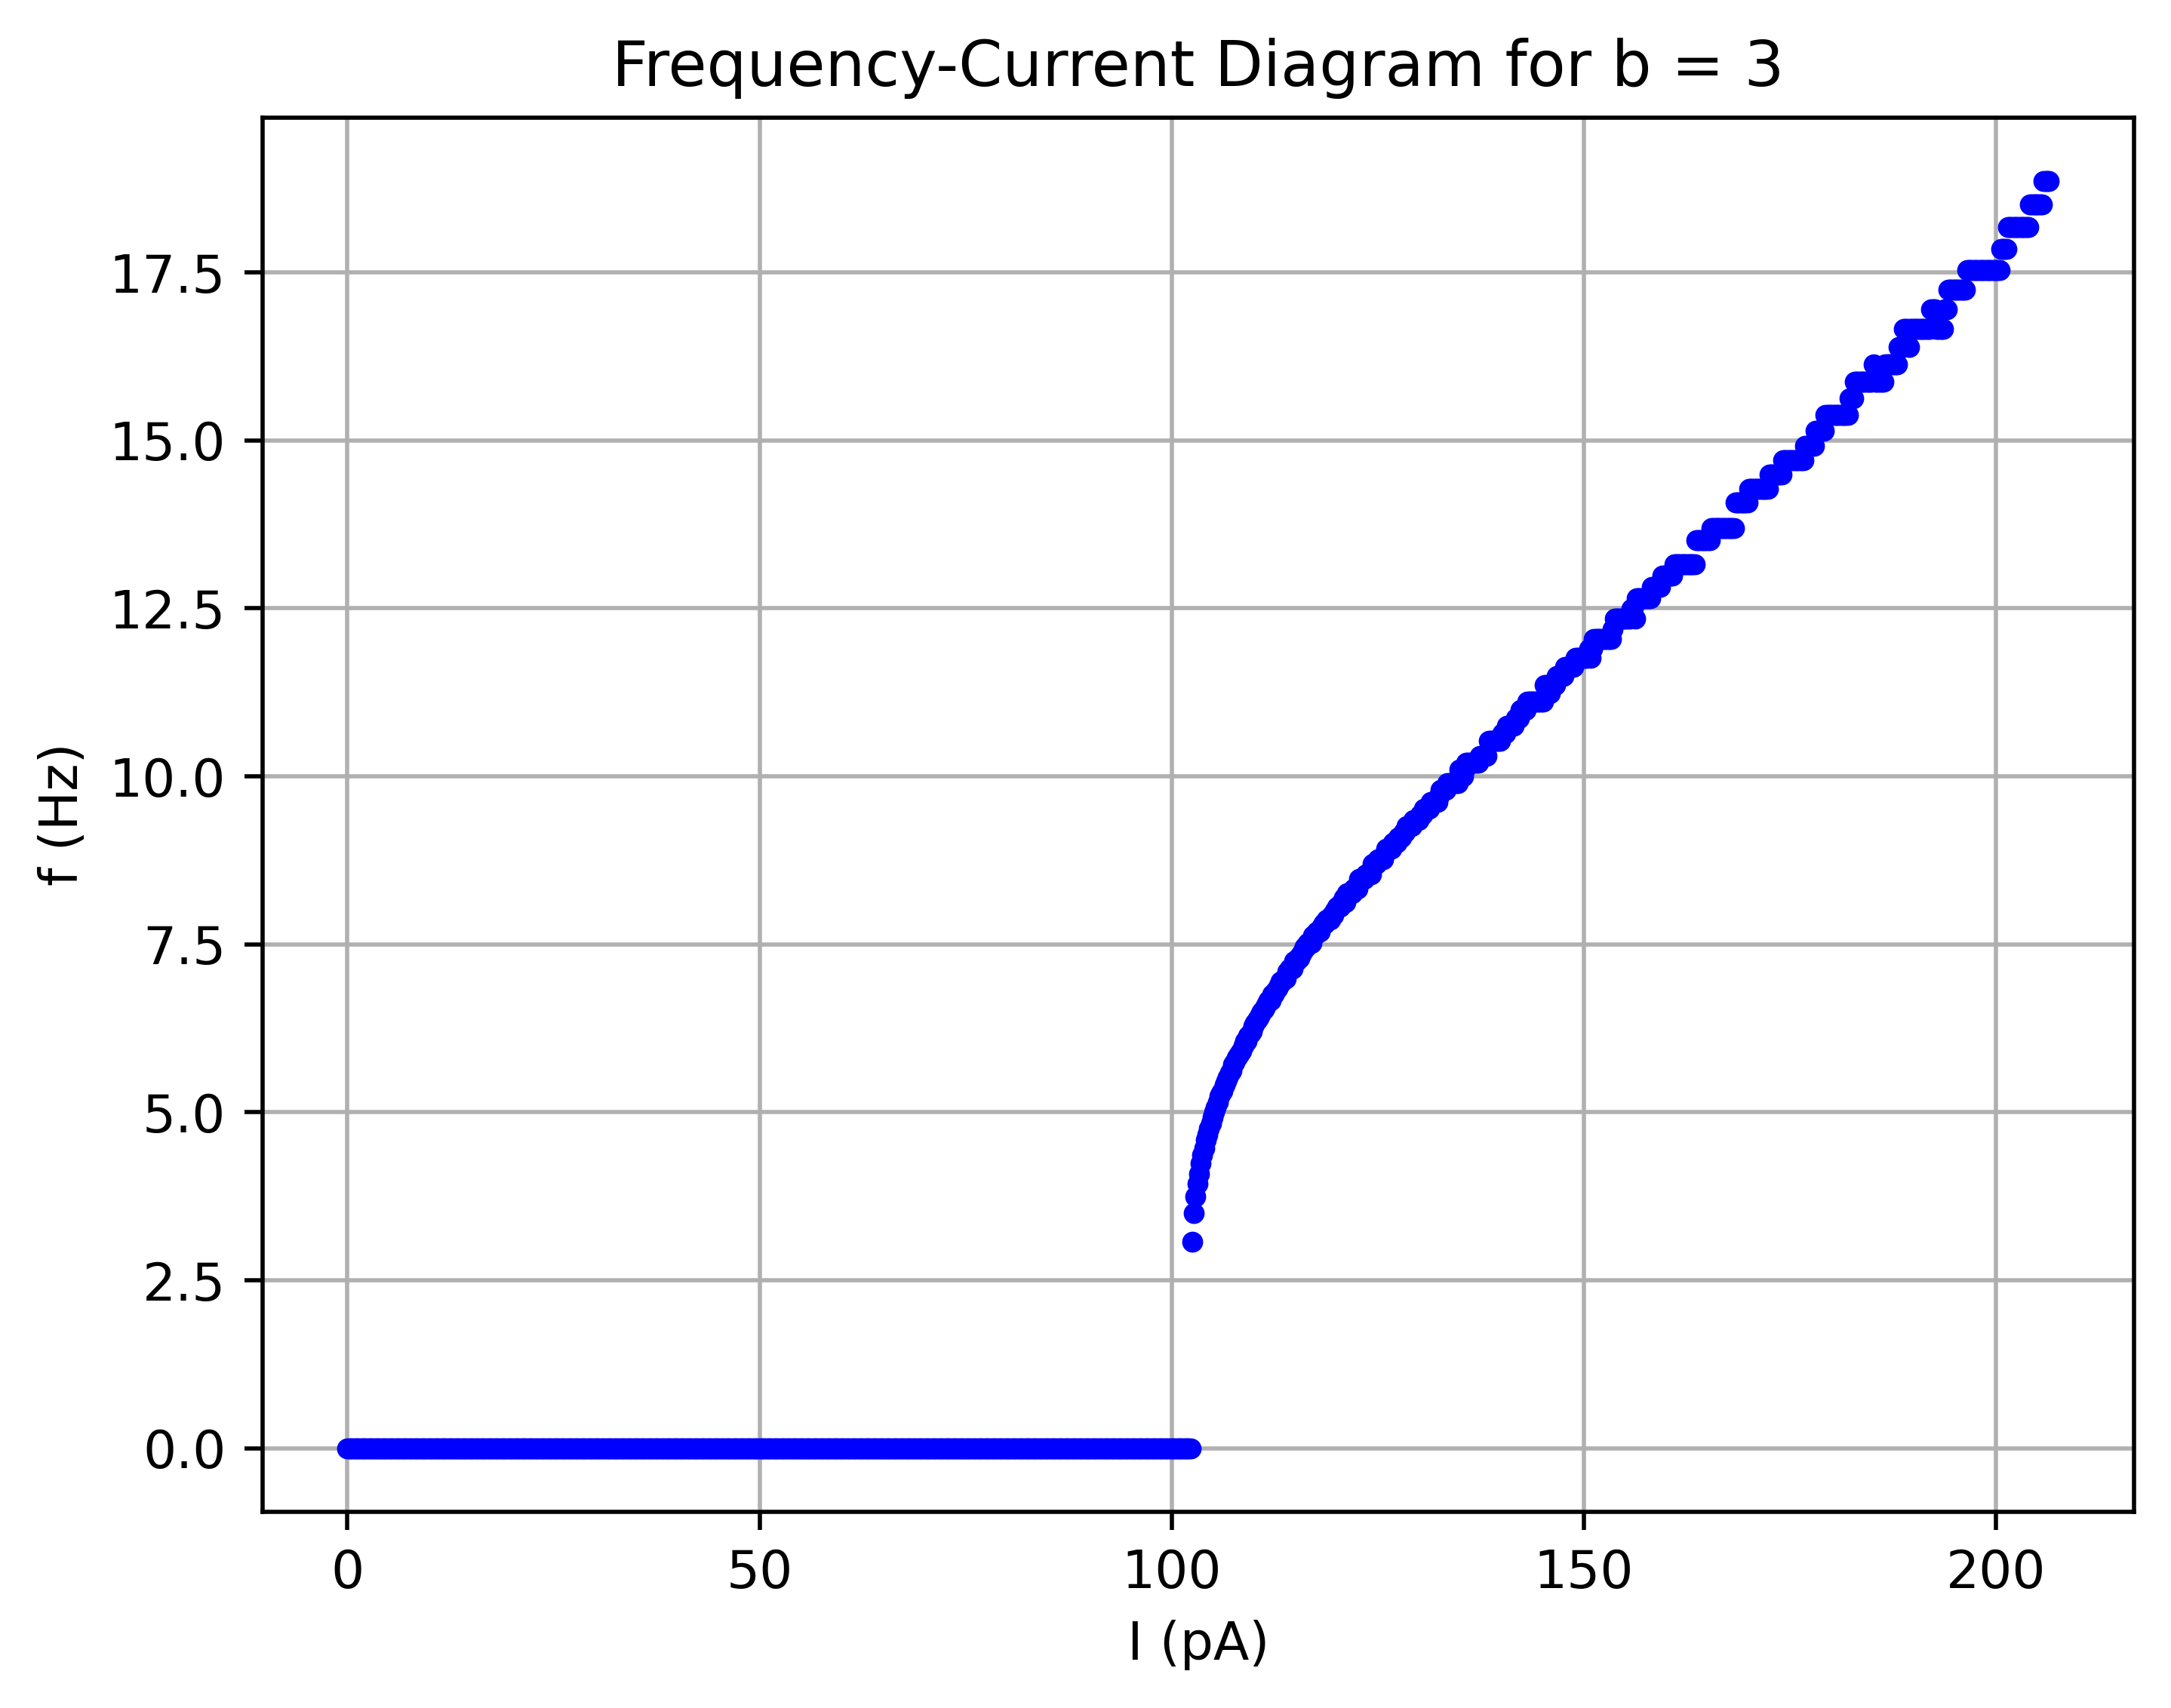

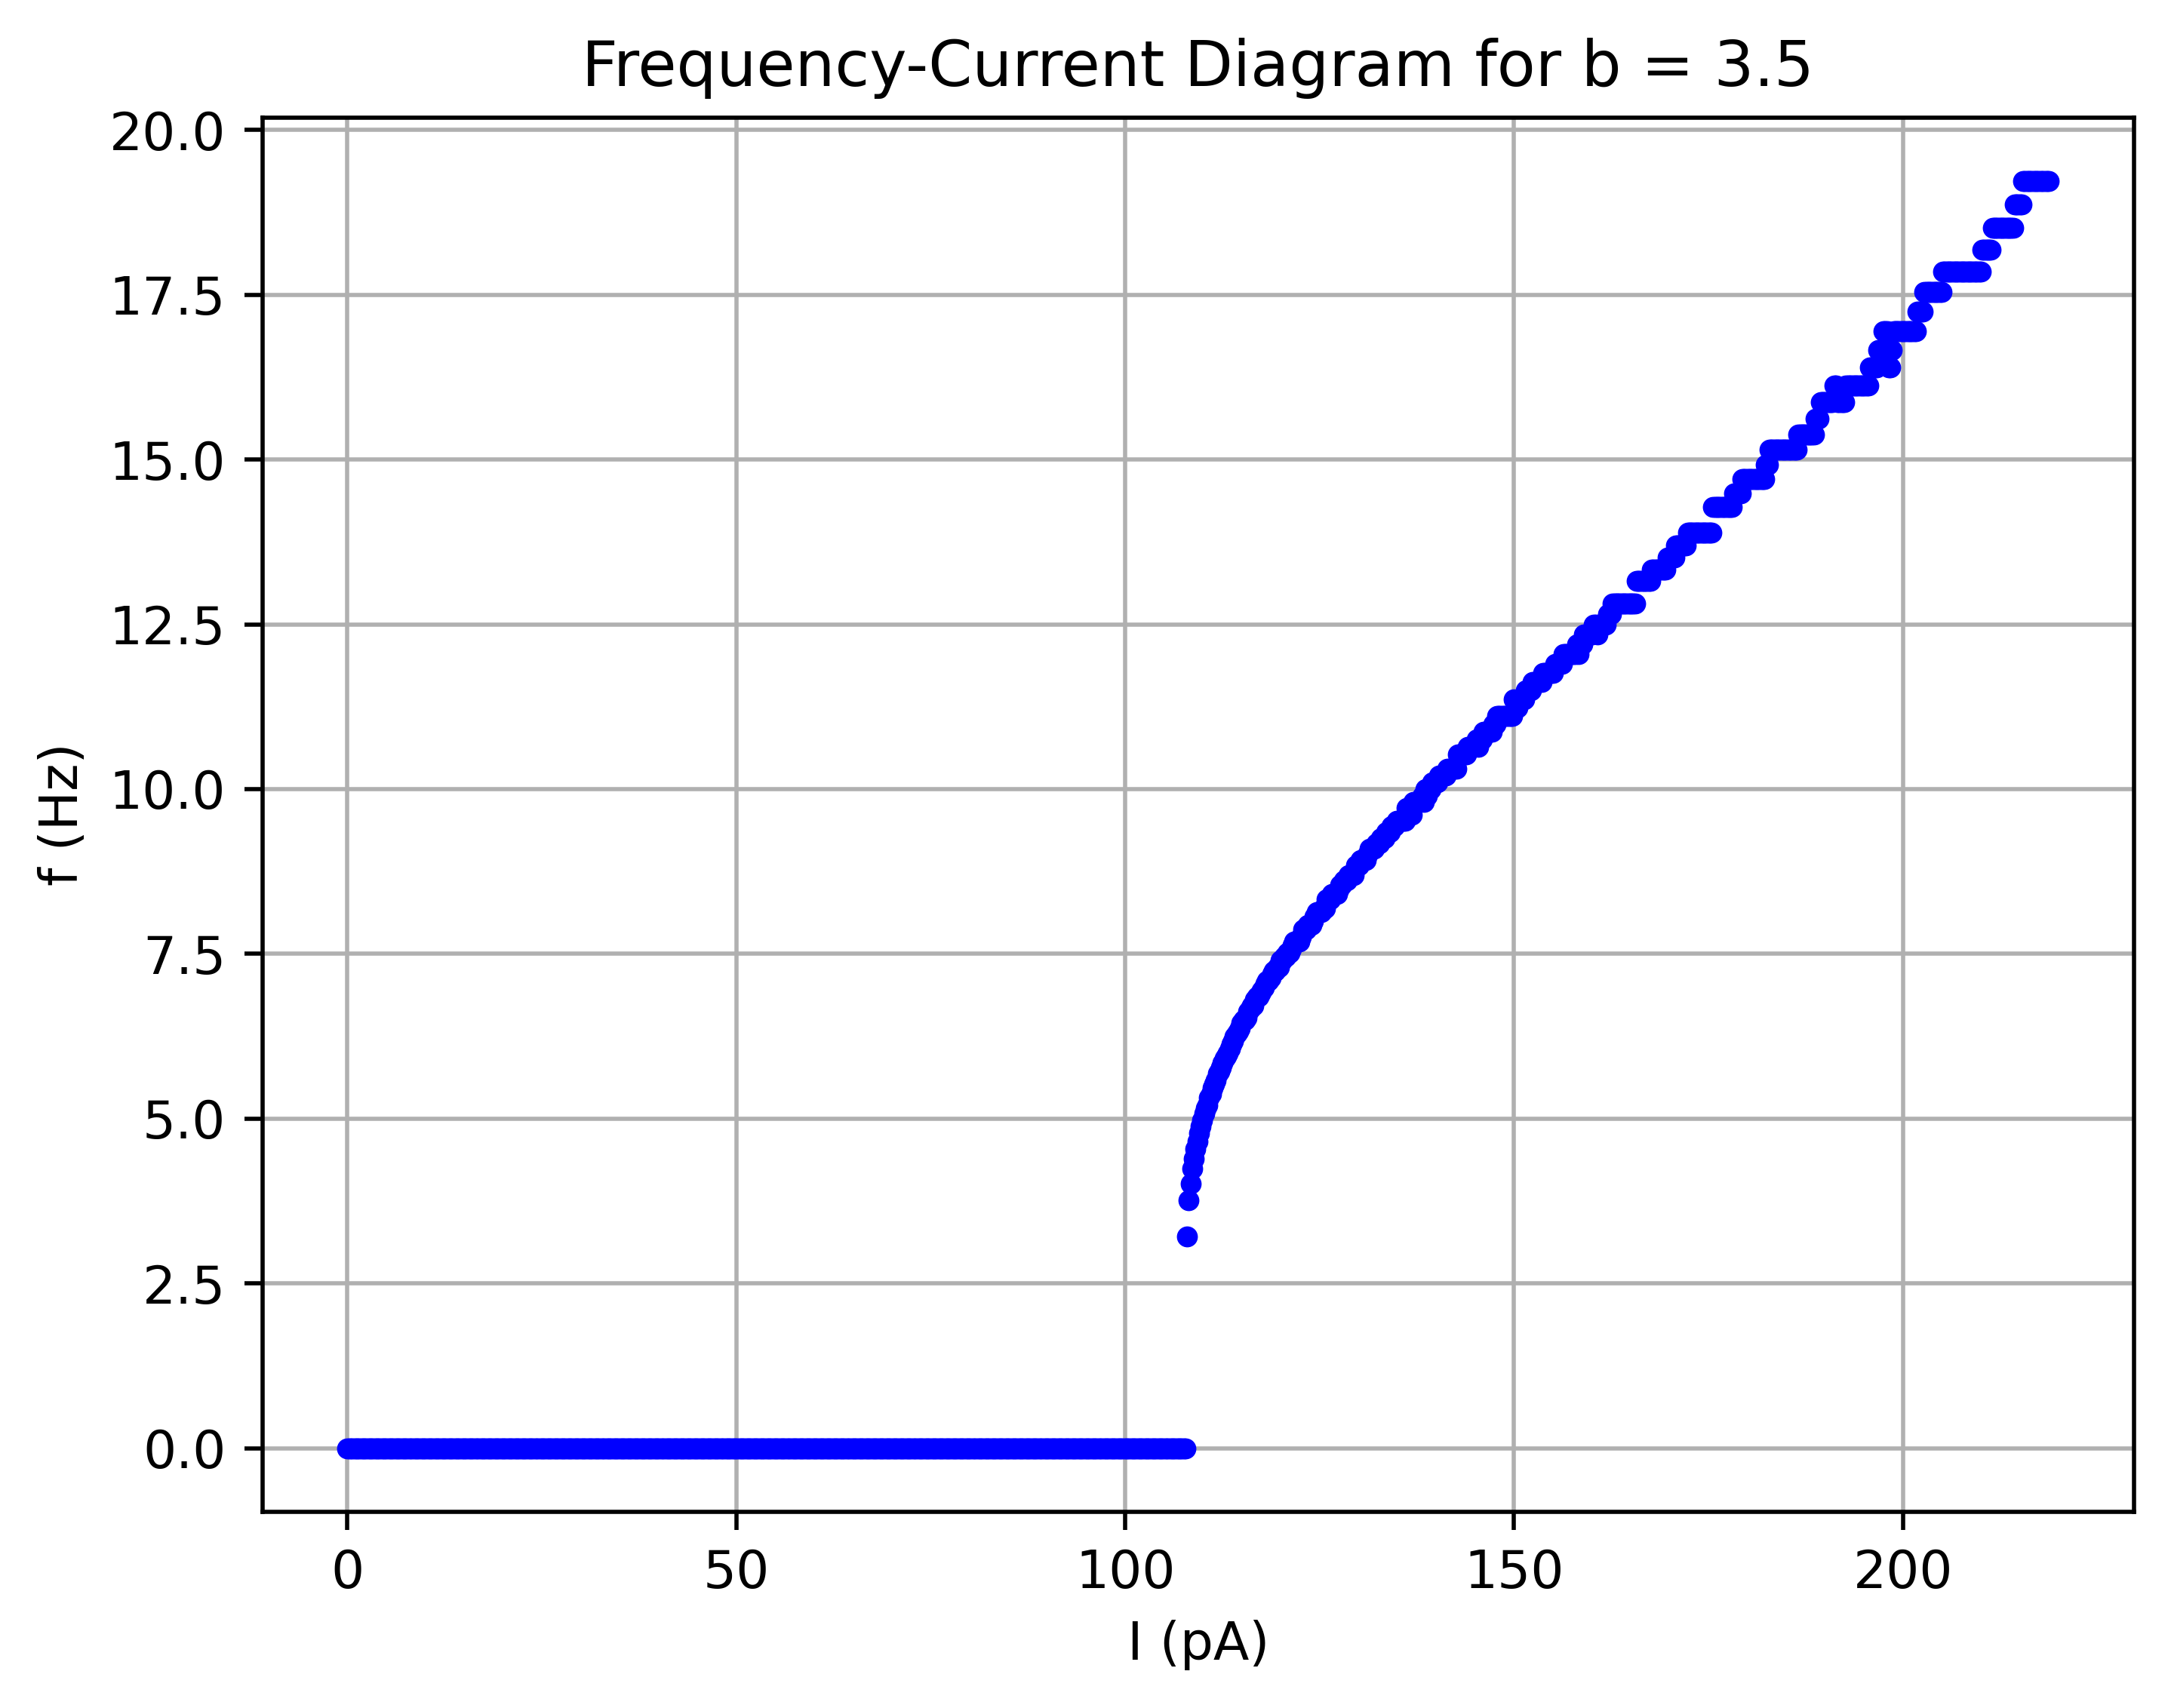

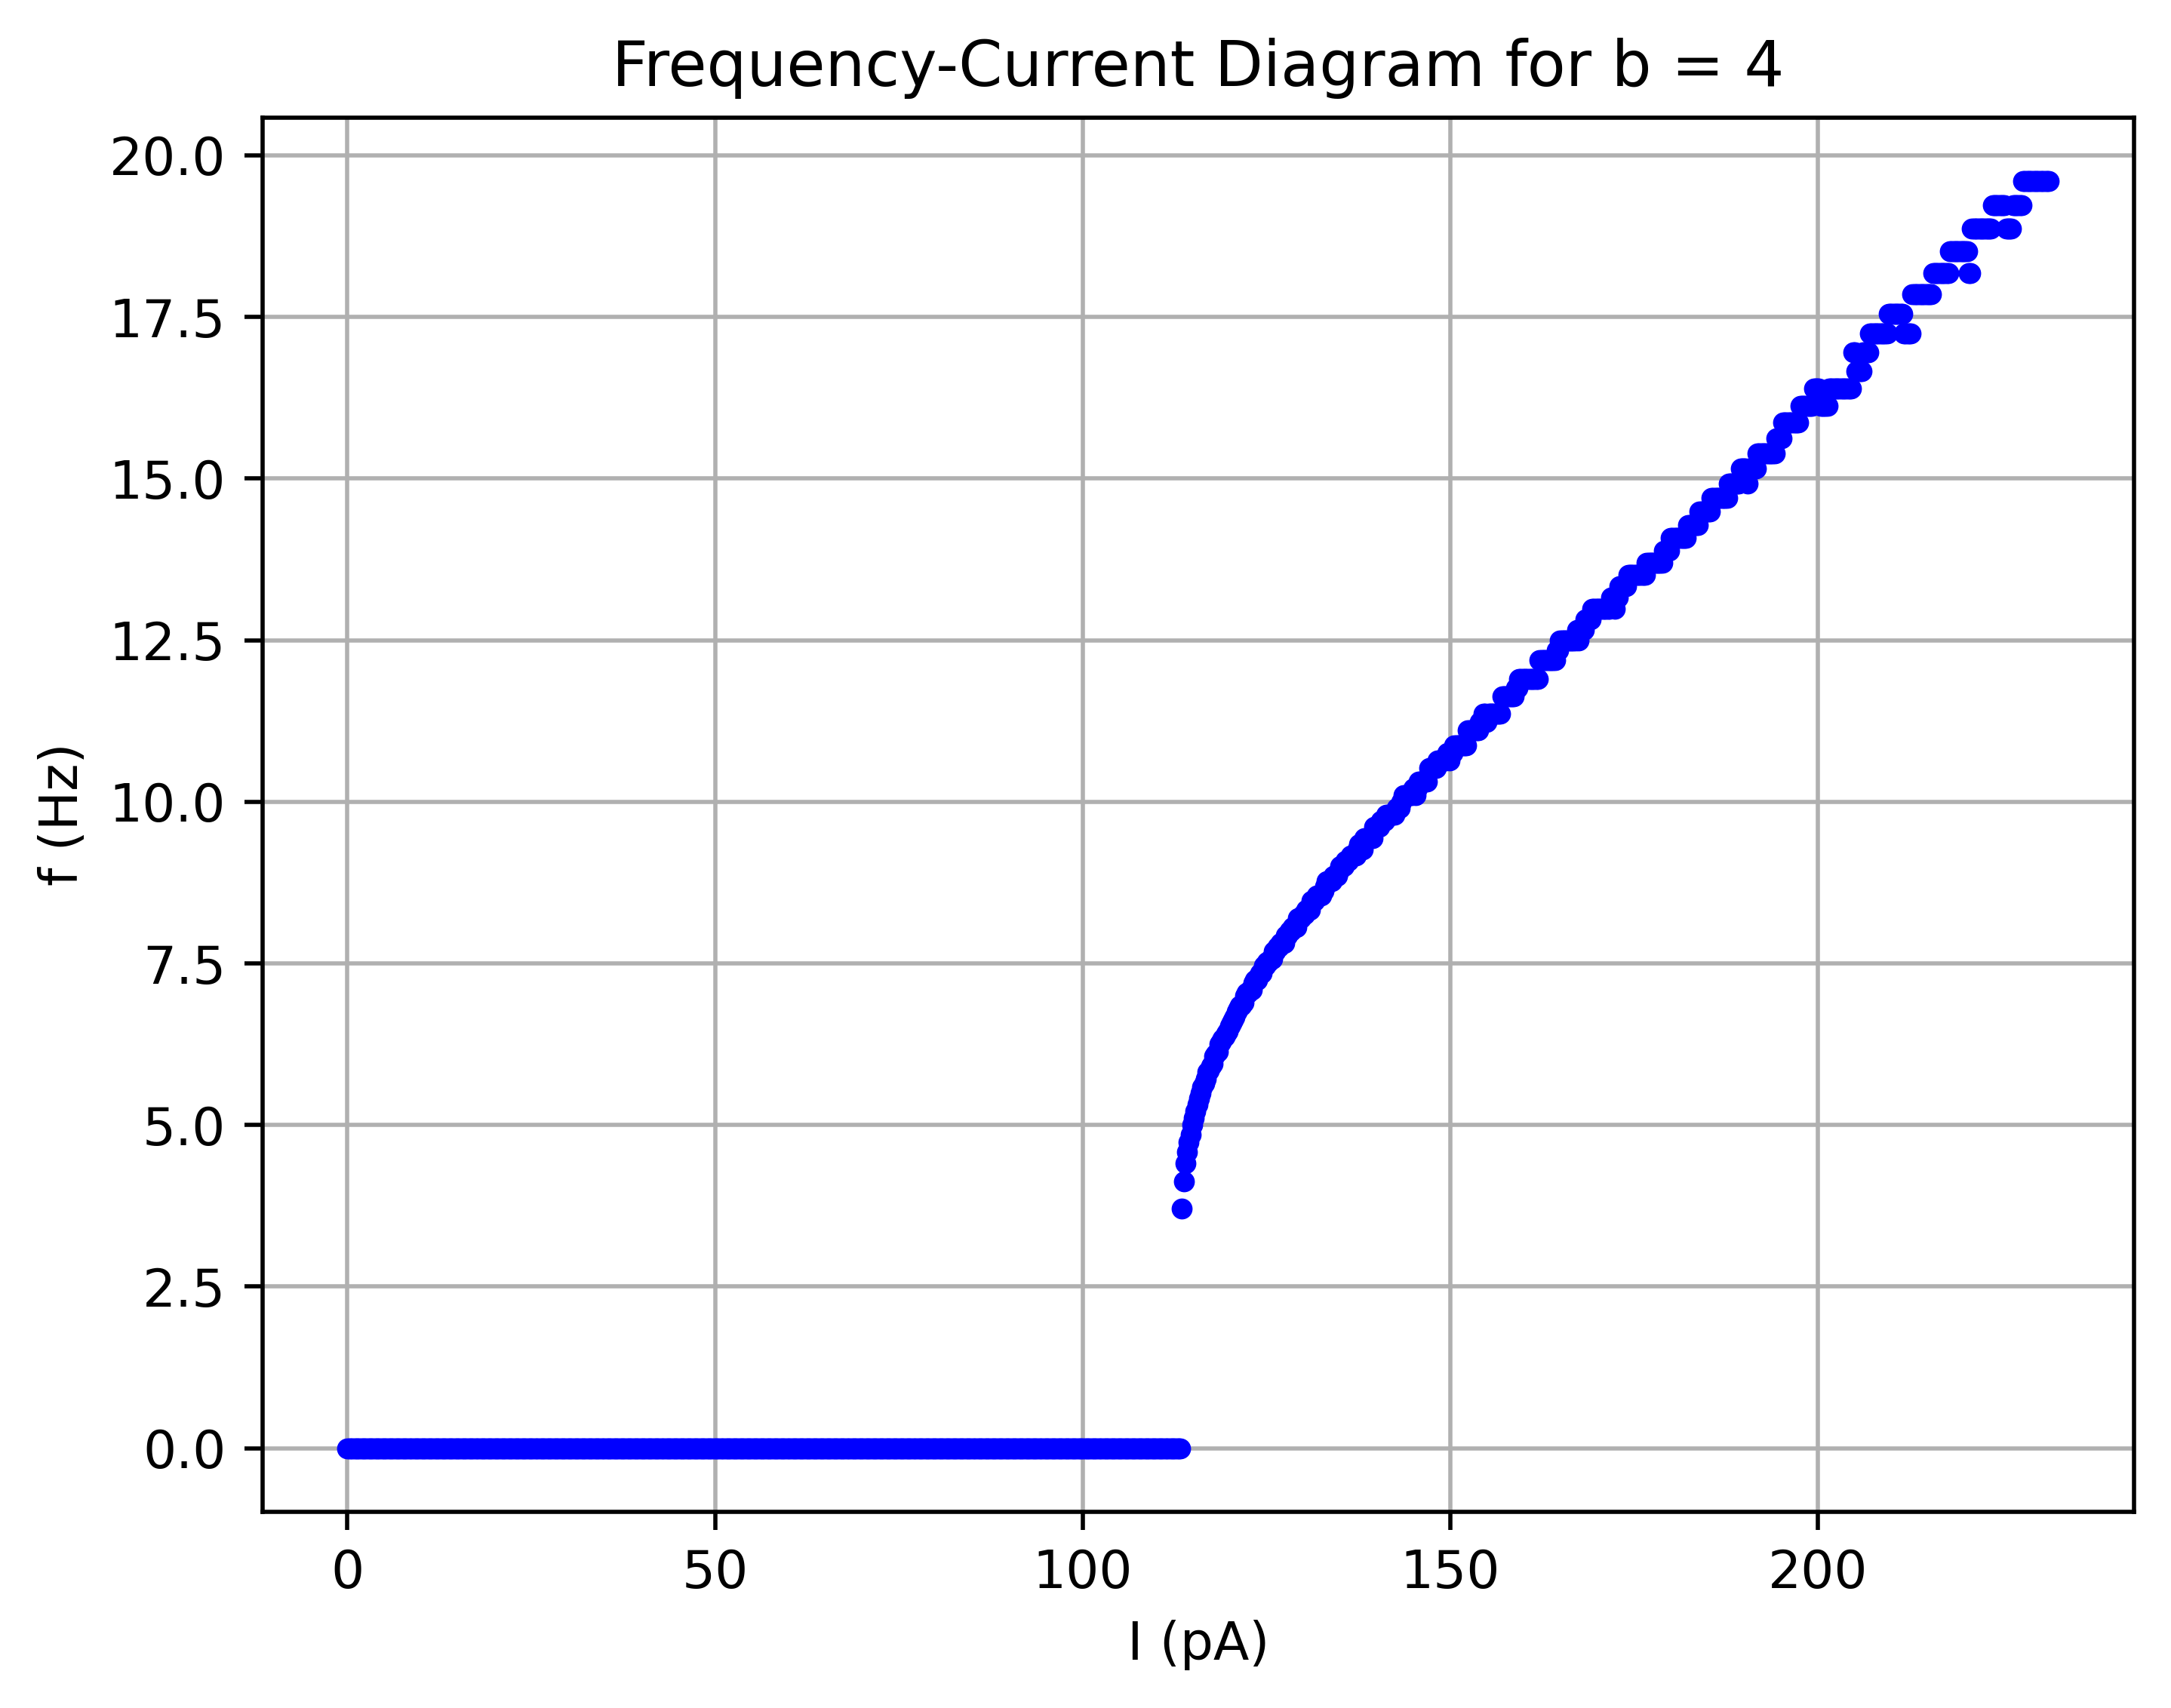

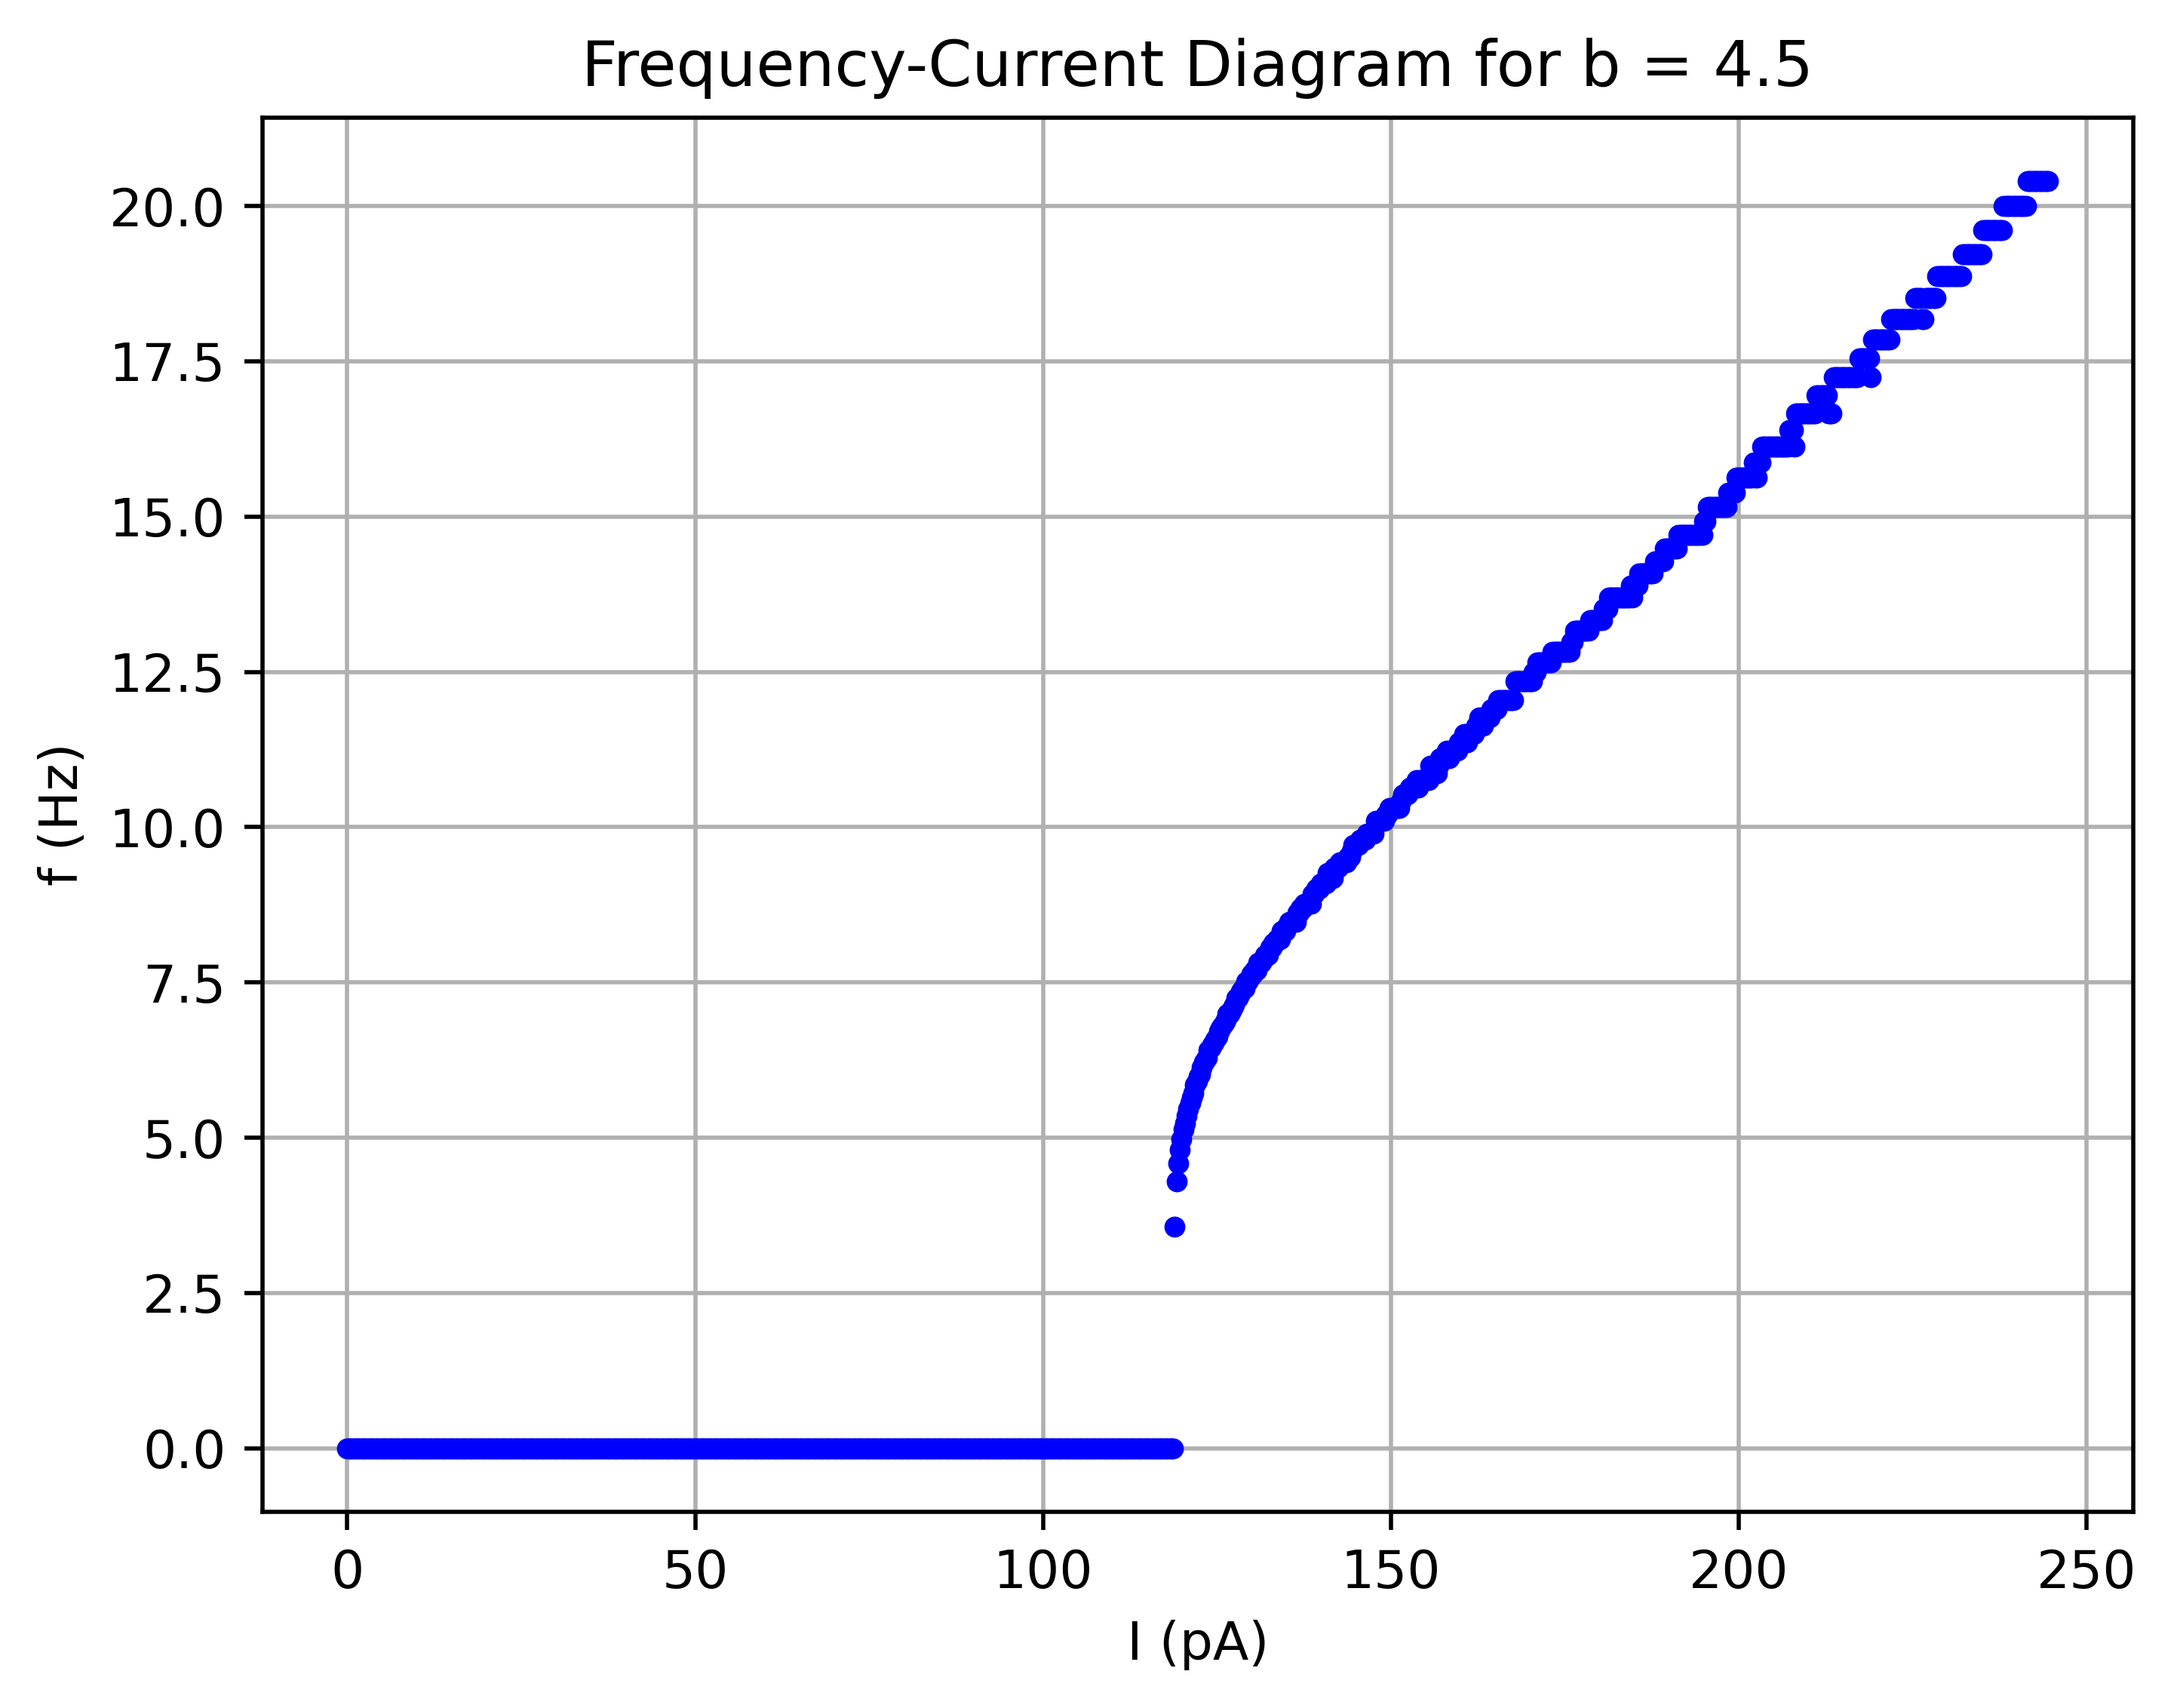

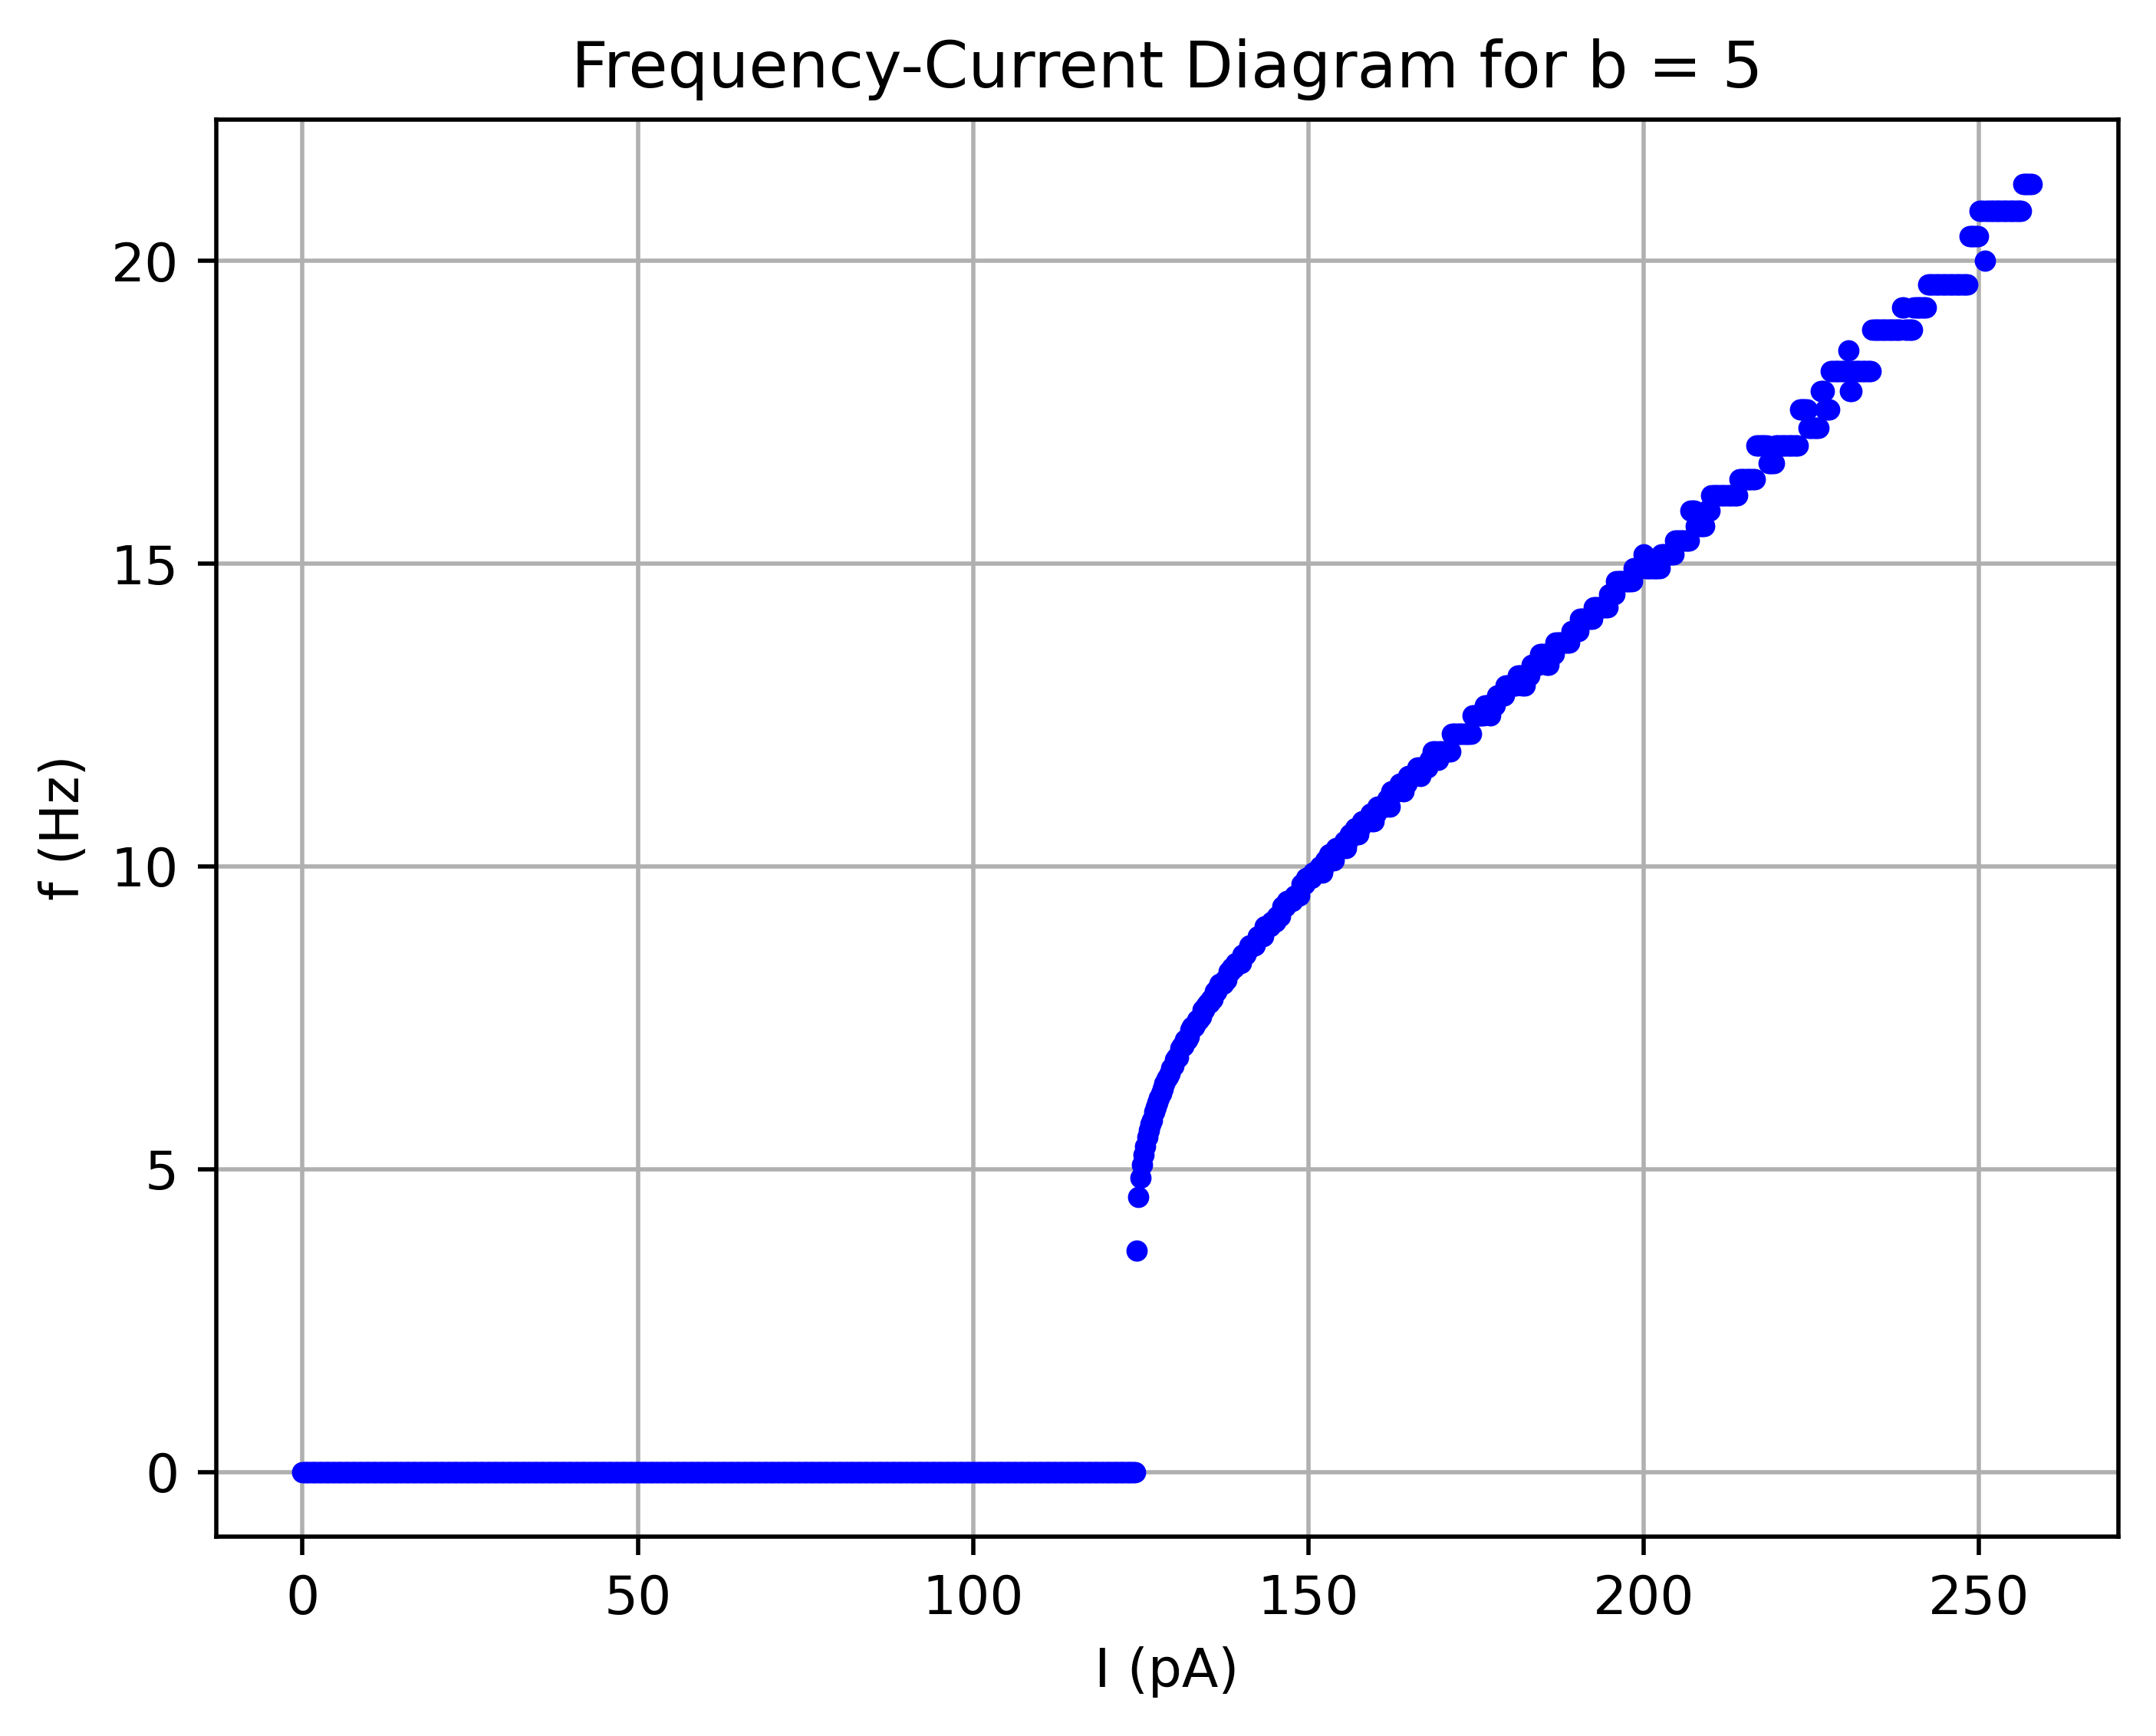

In [8]:
class simple_params:
    '''
    Define the parameter of the Izhikevich model

    C: membrane capacitance
    k: 
    vr: resting membrane potential
    vt: instantaneous threshold potential
    b: amplify current if b < 0, resonant current if b > 0
    '''
    def __init__(self, C, k, vr, vt, a, b, c, d, vpeak):
        self.C = C
        self.k = k
        self.vr = vr
        self.vt = vt
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.vpeak = vpeak


def simple_model_FI(params, h, T, IC):
    '''
    euler_simple_model: computes the F-I relation of the Izhikevich
    model, and plot them

    return: v, a list of floats, membrane potential
            u, a list of floats, recovery current
            peak time
    
    params: a class of simple_params that contains the model parameters
    T: length of oscillation
    h: time step of numerical method
    IC: initial condition of the Izhikevich model
    pulse: perturbation of the current
    pulse_idx: a list of two natural numbers, where the first is the start
    of the index we want to perturb the current at, the the latter is the 
    end of the index we want to perturb the current at
    '''
    # we need to get the spike time of third spike and fourth spike
    # Retrieving parameters
    C = params.C
    k = params.k
    vr = params.vr
    vt = params.vt
    a = params.a
    b = params.b
    c = params.c
    d = params.d
    vpeak = params.vpeak
    
    datapoints = int(T/h) # number of samples
    time = np.linspace(0, int(T*h), datapoints)

    # Save all figures into a single PDF file
    pdf_filename = 'FI_curves.pdf'
    pdf = PdfPages(pdf_filename)

    for j, b_j in enumerate(b):
        I_b_j = ((vt - vr)*k + b_j)**2/(4*k)
        current_array = np.linspace(0, 2*I_b_j, 1000)
        frequency = np.array([])
        for current in current_array:
            peak_idx = np.array([])
            peak_time = np.array([])
            I = np.zeros(datapoints)
            I[int(0.3*datapoints):] = current
            v = np.zeros(datapoints)
            u = np.zeros(datapoints)
            v[0] = IC
            for i, time_i in enumerate(time):
                if i == datapoints - 1:
                    break
                v[i+1] = v[i] + (h/C) * (k*(v[i]- vr)*(v[i]-vt) - u[i] + I[i])
                u[i+1] = u[i] + h*a*(b_j*(v[i] - vr) - u[i])
                if v[i+1] >= vpeak:
                    v[i] = vpeak
                    peak_idx = np.append(peak_idx, i)
                    peak_time = np.append(peak_time, time[i])
                    v[i+1] = c
                    u[i+1] = u[i+1] + d
            if len(peak_time) >= 4:
                f_i = 1000/(peak_time[3] - peak_time[2])
                frequency = np.append(frequency, f_i)
            else:
                frequency = np.append(frequency, 0)
    
        # Plotting the frequency current curve
        plt.figure(dpi = 500)
        plt.plot(current_array, frequency, 'bo', markersize = 3)
        plt.title(f'Frequency-Current Diagram for b = {b_j}')
        plt.xlabel('I (pA)')
        plt.ylabel('f (Hz)')
        plt.grid()
        pdf.savefig()

    pdf.close()
    return None
            
h = 1
T = 10000
pulse = 0
pulse_idx = 0
C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03
b = [-2, 0.5, 1, 1.5, 2, 3, 3.5, 4, 4.5, 5]
c = -50
d = 100
vpeak = 35
parameters = simple_params(C, k, vr, vt, a, b, c, d, vpeak)
IC = vr

results = simple_model_FI(parameters, h, T, IC)

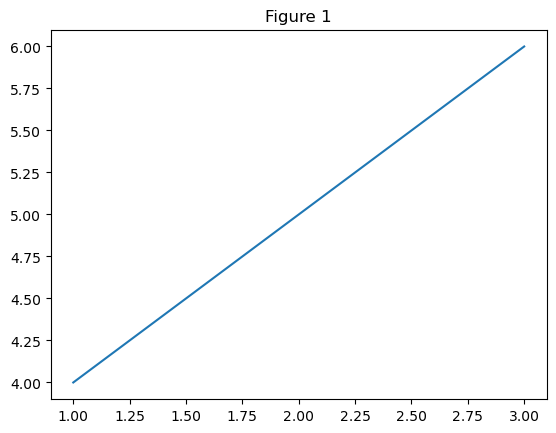

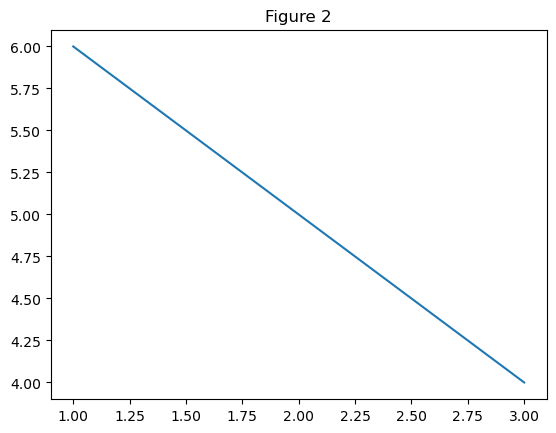

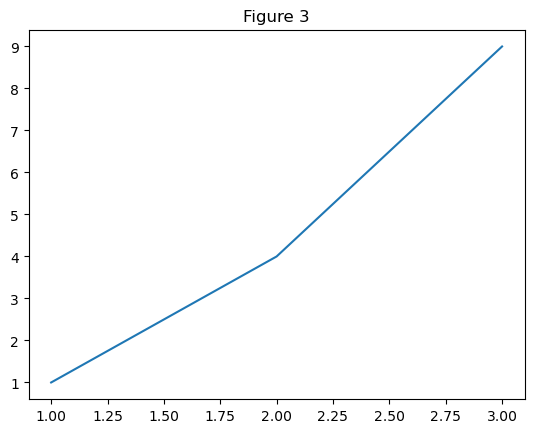

In [5]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Create a PdfPages object
pdf_filename = 'multiple_figures.pdf'
pdf = PdfPages(pdf_filename)

# Create and save the first figure
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Figure 1')
pdf.savefig()  # Save the current figure into the PDF

# Create and save the second figure
plt.figure()
plt.plot([1, 2, 3], [6, 5, 4])
plt.title('Figure 2')
pdf.savefig()  # Save the current figure into the PDF

# Create and save the third figure
plt.figure()
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('Figure 3')
pdf.savefig()  # Save the current figure into the PDF

# Close the PdfPages object
pdf.close()
